#Audio Dataset Analysis

##Introduction


In this project, I am trying to classify audio files into two categories: questions (labeled 'A') and non-questions (labeled 'B'). The goal is to extract relevant features from the audio files, train a machine learning model, and use it to classify new audio files.

This notebook is a part of Statistical Analysis Course, here the report: [project report](https://docs.google.com/document/d/1hukc4z_YgyTRf_UpW3CJ8bwUR0I4uE3S_w8ISixJkw4/edit?usp=sharing
)


Step 1: Data Preparation

        Uploading 59 files, containing
          - 16 marked by 'A' are questions
          - 43 marked 'B' non-question

        Loading the files, creating list of files and list of labels.

Step 2: EDA - Features Extraction, Clastering.

        Extracting 90 features for each of 59 audio files.

        Features research with Clastering

Step 3: Model Training.
        Using Random Forest to model.

Step 4: Model Evalution.

Step 5: Model Testing.
        
        Testing on 33 files, containing
          - 7 marked by 'A' are questions
          - 26 marked 'B' non-question

Step 6: Conclusions.


#Step 1 - Data Preparation


Started with a dataset containing 59 labeled audio files, out of which 16 were marked as 'A' (questions) and 43 as 'B' (statements or other expressions). For the new data, used 33 audio files.


In [2]:
!pip install gitpython pydub


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.9 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [5]:
import librosa
import numpy as np
import os

In [6]:
from git import Repo

In [7]:
# Clone the repository
repo_url = 'https://github.com/annakoopenu/audio-shorts.git'
repo_path = 'content/audio-shorts'


# Delete the existing directory
os.system("rm -rf " + repo_path)

# Clone the repository
repo = Repo.clone_from(repo_url, repo_path)


In [8]:
ls content/audio-shorts/

59_33_Modeling.ipynb  audio-files/      README.md
Aibolit_33_parts/     audio_files.json  Telefon_59_parts/


In [9]:
from pydub import AudioSegment

# Path to the directory containing the .wav files
audio_dir = os.path.join(repo_path, 'Telefon_59_parts')

# List to store audio data
audio_files = []

# Read all .wav files in the directory
for file_name in os.listdir(audio_dir):
    if file_name.endswith('.wav'):
        file_path = os.path.join(audio_dir, file_name)
        audio = AudioSegment.from_wav(file_path)
        audio_files.append(audio)

# Print the number of audio files loaded
print(f"Loaded {len(audio_files)} audio files.")


Loaded 59 audio files.


In [10]:
# Path to the directory containing the .wav files
audio_dir = os.path.join(repo_path, 'Aibolit_33_parts')

# List to store audio data
audio_files = []

# Read all .wav files in the directory
for file_name in os.listdir(audio_dir):
    if file_name.endswith('.wav'):
        #print(file_name)
        file_path = os.path.join(audio_dir, file_name)
        audio = AudioSegment.from_wav(file_path)
        audio_files.append(audio)

# Print the number of audio files loaded
print(f"Loaded {len(audio_files)} audio files.")


Loaded 33 audio files.


In [11]:
ls content/audio-shorts/Aibolit_33_parts

aibolit_01_B.wav  aibolit_08_B.wav  aibolit_15_A.wav  aibolit_22_B.wav  aibolit_29_B.wav
aibolit_02_B.wav  aibolit_09_A.wav  aibolit_16_B.wav  aibolit_23_A.wav  aibolit_30_B.wav
aibolit_03_B.wav  aibolit_10_B.wav  aibolit_17_B.wav  aibolit_24_B.wav  aibolit_31_B.wav
aibolit_04_B.wav  aibolit_11_B.wav  aibolit_18_A.wav  aibolit_25_A.wav  aibolit_32_B.wav
aibolit_05_B.wav  aibolit_12_B.wav  aibolit_19_B.wav  aibolit_26_B.wav  aibolit_33_B.wav
aibolit_06_B.wav  aibolit_13_B.wav  aibolit_20_B.wav  aibolit_27_A.wav  aibolit_orig.info_
aibolit_07_A.wav  aibolit_14_B.wav  aibolit_21_B.wav  aibolit_28_B.wav


In [12]:
ls content/audio-shorts/Telefon_59_parts

10A.wav  16A.wav  21B.wav  27B.wav  32A.wav  38B.wav  43B.wav  49A.wav  54A.wav  5B.wav
11B.wav  17B.wav  22B.wav  28B.wav  33B.wav  39A.wav  44B.wav  4A.wav   55B.wav  6A.wav
12B.wav  18B.wav  23B.wav  29B.wav  34B.wav  3B.wav   45A.wav  50B.wav  56B.wav  7B.wav
13A.wav  19B.wav  24B.wav  2A.wav   35B.wav  40B.wav  46B.wav  51A.wav  57B.wav  8A.wav
14B.wav  1B.wav   25B.wav  30B.wav  36A.wav  41B.wav  47A.wav  52B.wav  58B.wav  9B.wav
15B.wav  20B.wav  26B.wav  31B.wav  37B.wav  42A.wav  48B.wav  53B.wav  59B.wav


In [13]:
# = 'content/audio-shorts/Aibolit_33_parts'
directory = 'content/audio-shorts/Telefon_59_parts'

In [14]:
import re

# List all WAV files in the directory
files = [f for f in os.listdir(directory) if f.endswith('.wav')]

# Function to parse file names and extract ID and category
def parse_filename(filename):
    # Using regex to extract the part of the filename before 'A' or 'B'
    match = re.match(r"(\d+)([A-Z])\.wav", filename)
    if match:
        # Return a tuple of ID (as integer) and category
        return (int(match.group(1)), match.group(2))
    else:
        return None

# Create a list of tuples from the filenames
file_info = [parse_filename(file) for file in files if parse_filename(file)]

# Convert the list of tuples into a DataFrame
df59 = pd.DataFrame(file_info, columns=['file_name', 'group'])

df59.head()

,file_name,group
0,33,B
1,56,B
2,58,B
3,57,B
4,55,B


In [15]:
# Count the number of files in each category
category_counts = df59['group'].value_counts()
print(category_counts)

group
B    43
A    16
Name: count, dtype: int64


<hr>

##Step 2: Feature Extraction - for each audio 30x3 matrix

1. Pitch Features: Mean, range, and variance of the pitch.
2. Spectral Centroid Features: Mean, range, and variance of the spectral centroid.
3. Zero Crossing Rate Features: Mean, range, and variance of the zero crossing rate.  
4. MFCC Features: Mean, range, and variance of each of the **13** MFCC coefficients.
5. Spectral Rolloff Features: Mean, range, and variance of the spectral rolloff.
6. RMS Energy Features: Mean, range, and variance of the RMS energy.
7. Chromagram Features: Mean, range, and variance of each of the **12** chroma pitch classes.


In [16]:
def extract_featuresAAA(filename):
    # Load audio file
    y, sample_rate = librosa.load(filename, sr=None)

    # Feature 1: Pitch (using librosa's piptrack)
    pitches, magnitudes = librosa.piptrack(y=y, sr=sample_rate)

    # Mask to extract pitches where magnitudes are above a threshold
    mask = magnitudes > np.median(magnitudes)
    filtered_pitches = pitches[mask]

    # Calculate pitch features
    pitch_mean = np.mean(filtered_pitches)
    pitch_range = np.max(filtered_pitches) - np.min(filtered_pitches)
    pitch_variance = np.var(filtered_pitches)

    # Combine all pitch features into a single array
    pitch_features = [pitch_mean, pitch_range, pitch_variance]

    # Feature 2: Spectral Centroid
    spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sample_rate)
    spectral_centroid_mean = np.mean(spectral_centroids)
    spectral_centroid_range = np.max(spectral_centroids) - np.min(spectral_centroids)
    spectral_centroid_variance = np.var(spectral_centroids)

    # Combine all spectral centroid features into a single array
    spectral_centroid_features = [spectral_centroid_mean, spectral_centroid_range, spectral_centroid_variance]

    # Feature 3: Zero Crossing Rate
    zero_crossings = librosa.feature.zero_crossing_rate(y)
    zcr_mean = np.mean(zero_crossings)
    zcr_range = np.max(zero_crossings) - np.min(zero_crossings)
    zcr_variance = np.var(zero_crossings)

    # Combine all zero crossing rate features into a single array
    zcr_features = [zcr_mean, zcr_range, zcr_variance]

    # Feature 4: MFCC
    mfccs = librosa.feature.mfcc(y=y, sr=sample_rate, n_mfcc=13)
    mfcc_mean = np.mean(mfccs, axis=1)
    mfcc_range = np.max(mfccs, axis=1) - np.min(mfccs, axis=1)
    mfcc_variance = np.var(mfccs, axis=1)

    # Flatten MFCC features into a single array
    mfcc_features = np.hstack([mfcc_mean, mfcc_range, mfcc_variance])

    # Feature 5: Spectral Rolloff
    spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sample_rate)
    spectral_rolloff_mean = np.mean(spectral_rolloff)
    spectral_rolloff_range = np.max(spectral_rolloff) - np.min(spectral_rolloff)
    spectral_rolloff_variance = np.var(spectral_rolloff)

    spectral_rolloff_features = [spectral_rolloff_mean, spectral_rolloff_range, spectral_rolloff_variance]

    # Feature 6: RMS Energy
    rms = librosa.feature.rms(y=y)
    rms_mean = np.mean(rms)
    rms_range = np.max(rms) - np.min(rms)
    rms_variance = np.var(rms)

    rms_features = [rms_mean, rms_range, rms_variance]

    # Feature 7: Chromagram
    chroma = librosa.feature.chroma_stft(y=y, sr=sample_rate)
    chroma_mean = np.mean(chroma, axis=1)
    chroma_range = np.max(chroma, axis=1) - np.min(chroma, axis=1)
    chroma_variance = np.var(chroma, axis=1)

    chroma_features = np.hstack([chroma_mean, chroma_range, chroma_variance])

    # Combine all features into a single array
    features = (pitch_features + spectral_centroid_features + zcr_features + list(mfcc_features) +
                spectral_rolloff_features + rms_features + list(chroma_features))

    # Reshape the combined features into a matrix with 3 columns
    features_matrix = np.array(features).reshape(-1, 3)

    features_matrix_rows_names = [
        'feature1: Pitch',
        'feature2: Spectral Centroid',
        'feature3: Zero Crossing Rate',
        'feature4: MFCC1',
        'feature5: MFCC2',
        'feature6: MFCC3',
        'feature7: MFCC4',
        'feature8: MFCC5',
        'feature9: MFCC6',
        'feature10: MFCC7',
        'feature11: MFCC8',
        'feature12: MFCC9',
        'feature13: MFCC10',
        'feature14: MFCC11',
        'feature15: MFCC12',
        'feature16: MFCC13',
        'feature17: Spectral Rolloff',
        'feature18: RMS Energy',
        'feature19: Chromagram1',
        'feature20: Chromagram2',
        'feature21: Chromagram3',
        'feature22: Chromagram4',
        'feature23: Chromagram5',
        'feature24: Chromagram6',
        'feature25: Chromagram7',
        'feature26: Chromagram8',
        'feature27: Chromagram9',
        'feature28: Chromagram10',
        'feature29: Chromagram11',
        'feature30: Chromagram12'
    ]

    features_matrix_column_names = [
        ['pitch_mean', 'pitch_range', 'pitch_variance'],
        ['spectral_centroid_mean', 'spectral_centroid_range', 'spectral_centroid_variance'],
        ['zcr_mean', 'zcr_range', 'zcr_variance'],
        ['mfcc1_mean', 'mfcc1_range', 'mfcc1_variance'],
        ['mfcc2_mean', 'mfcc2_range', 'mfcc2_variance'],
        ['mfcc3_mean', 'mfcc3_range', 'mfcc3_variance'],
        ['mfcc4_mean', 'mfcc4_range', 'mfcc4_variance'],
        ['mfcc5_mean', 'mfcc5_range', 'mfcc5_variance'],
        ['mfcc6_mean', 'mfcc6_range', 'mfcc6_variance'],
        ['mfcc7_mean', 'mfcc7_range', 'mfcc7_variance'],
        ['mfcc8_mean', 'mfcc8_range', 'mfcc8_variance'],
        ['mfcc9_mean', 'mfcc9_range', 'mfcc9_variance'],
        ['mfcc10_mean', 'mfcc10_range', 'mfcc10_variance'],
        ['mfcc11_mean', 'mfcc11_range', 'mfcc11_variance'],
        ['mfcc12_mean', 'mfcc12_range', 'mfcc12_variance'],
        ['mfcc13_mean', 'mfcc13_range', 'mfcc13_variance'],
        ['spectral_rolloff_mean', 'spectral_rolloff_range', 'spectral_rolloff_variance'],
        ['rms_mean', 'rms_range', 'rms_variance'],
        ['chroma1_mean', 'chroma1_range', 'chroma1_variance'],
        ['chroma2_mean', 'chroma2_range', 'chroma2_variance'],
        ['chroma3_mean', 'chroma3_range', 'chroma3_variance'],
        ['chroma4_mean', 'chroma4_range', 'chroma4_variance'],
        ['chroma5_mean', 'chroma5_range', 'chroma5_variance'],
        ['chroma6_mean', 'chroma6_range', 'chroma6_variance'],
        ['chroma7_mean', 'chroma7_range', 'chroma7_variance'],
        ['chroma8_mean', 'chroma8_range', 'chroma8_variance'],
        ['chroma9_mean', 'chroma9_range', 'chroma9_variance'],
        ['chroma10_mean', 'chroma10_range', 'chroma10_variance'],
        ['chroma11_mean', 'chroma11_range', 'chroma11_variance'],
        ['chroma12_mean', 'chroma12_range', 'chroma12_variance']
    ]

    return features_matrix, features_matrix_rows_names, features_matrix_column_names

In [17]:
# Create the features data of 59.wav files
features = []
labels = []

features_matrix = []
features_matrix_rows_names = []
features_matrix_column_names =[]


for filename in os.listdir(directory):
    if filename.endswith('.wav'):
        file_path = os.path.join(directory, filename)
        features_matrix, features_matrix_rows_names, features_matrix_column_names = extract_featuresAAA(file_path)
        #print(features_matrix_column_names)
        feature_values = features_matrix

        # Extract label from the filename
        if 'A' in filename:
            label = 'A'
        elif 'B' in filename:
            label = 'B'
        else:
            label = 'Unknown'  # Handle unexpected cases
        # Append features and label separately
        features.append(feature_values)
        labels.append(label)

# Convert features and labels to numpy arrays
features = np.array(features)
labels = np.array(labels)

# Example to print the features and labels
#print('Features: ', features)
print('Features shape: ', features.shape)
#print('Features matrix: ', features_matrix)
print('Features matrix shape: ', features_matrix.shape)
print('Labels: ', labels)
#features_matrix_rows_names
#features_matrix_column_names

Features shape:  (59, 30, 3)
Features matrix shape:  (30, 3)
Labels:  ['B' 'B' 'B' 'B' 'B' 'A' 'B' 'B' 'B' 'B' 'A' 'B' 'B' 'A' 'A' 'A' 'B' 'B'
 'B' 'A' 'B' 'B' 'B' 'A' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'A' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'A' 'B' 'A' 'A' 'B' 'B' 'B' 'B' 'A' 'B' 'A' 'A' 'A' 'A'
 'B' 'B' 'B' 'B' 'B']


In [18]:
features.shape

(59, 30, 3)

In [19]:
features_matrix_column_names

[['pitch_mean', 'pitch_range', 'pitch_variance'],
 ['spectral_centroid_mean',
  'spectral_centroid_range',
  'spectral_centroid_variance'],
 ['zcr_mean', 'zcr_range', 'zcr_variance'],
 ['mfcc1_mean', 'mfcc1_range', 'mfcc1_variance'],
 ['mfcc2_mean', 'mfcc2_range', 'mfcc2_variance'],
 ['mfcc3_mean', 'mfcc3_range', 'mfcc3_variance'],
 ['mfcc4_mean', 'mfcc4_range', 'mfcc4_variance'],
 ['mfcc5_mean', 'mfcc5_range', 'mfcc5_variance'],
 ['mfcc6_mean', 'mfcc6_range', 'mfcc6_variance'],
 ['mfcc7_mean', 'mfcc7_range', 'mfcc7_variance'],
 ['mfcc8_mean', 'mfcc8_range', 'mfcc8_variance'],
 ['mfcc9_mean', 'mfcc9_range', 'mfcc9_variance'],
 ['mfcc10_mean', 'mfcc10_range', 'mfcc10_variance'],
 ['mfcc11_mean', 'mfcc11_range', 'mfcc11_variance'],
 ['mfcc12_mean', 'mfcc12_range', 'mfcc12_variance'],
 ['mfcc13_mean', 'mfcc13_range', 'mfcc13_variance'],
 ['spectral_rolloff_mean',
  'spectral_rolloff_range',
  'spectral_rolloff_variance'],
 ['rms_mean', 'rms_range', 'rms_variance'],
 ['chroma1_mean', 'chro

In [20]:
#features = []
#labels = []
#features_matrix = []
#features_matrix_rows_names = []
#features_matrix_column_names =[]

In [21]:
flattened_features = features.reshape(features.shape[0], -1)

In [22]:
flattened_features.shape

(59, 90)

In [23]:
labels

array(['B', 'B', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'A', 'B', 'B',
       'A', 'A', 'A', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'A', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'A', 'B', 'A', 'A', 'B', 'B', 'B', 'B', 'A', 'B', 'A', 'A',
       'A', 'A', 'B', 'B', 'B', 'B', 'B'], dtype='<U1')

In [24]:
df59.head()

,file_name,group
0,33,B
1,56,B
2,58,B
3,57,B
4,55,B


In [25]:
flattened_feature_names = [item for sublist in features_matrix_column_names for item in sublist]
flattened_features_names = np.array(flattened_feature_names)

My variables

In [26]:
labels
#flattened_features
#flattened_feature_names

array(['B', 'B', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'A', 'B', 'B',
       'A', 'A', 'A', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'A', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'A', 'B', 'A', 'A', 'B', 'B', 'B', 'B', 'A', 'B', 'A', 'A',
       'A', 'A', 'B', 'B', 'B', 'B', 'B'], dtype='<U1')

In [27]:
# Create DataFrame
df = pd.DataFrame(flattened_features, columns=flattened_feature_names)

In [28]:
df59.head()

,file_name,group
0,33,B
1,56,B
2,58,B
3,57,B
4,55,B


In [29]:
df.shape

(59, 90)

In [30]:
df59.shape

(59, 2)

In [31]:
df59 = pd.concat([df, df59,], axis=1)

In [32]:
df59.shape

(59, 92)

In [33]:
df59['label'] = labels


In [34]:
df59.head()

,pitch_mean,pitch_range,pitch_variance,spectral_centroid_mean,spectral_centroid_range,spectral_centroid_variance,zcr_mean,zcr_range,zcr_variance,mfcc1_mean,...,chroma10_variance,chroma11_mean,chroma11_range,chroma11_variance,chroma12_mean,chroma12_range,chroma12_variance,file_name,group,label
0,1884.342407,3850.714111,1.315679e+06,1982.630571,4229.737449,644171.920108,0.168069,0.696289,0.015241,-217.609802,...,0.095429,0.099164,0.115840,0.107907,0.088173,0.096639,0.107229,33,B,B
1,1478.033691,3837.993164,1.082023e+06,1533.012237,3836.558170,410742.526834,0.115537,0.520020,0.008149,-252.016754,...,0.101367,0.134209,0.111662,0.130047,0.116011,0.107788,0.075431,56,B,B
2,954.271545,3850.890137,9.336337e+05,1244.303361,4019.060176,392822.836906,0.083970,0.566406,0.006597,-349.487305,...,0.085721,0.114890,0.148174,0.105001,0.072174,0.078031,0.086636,58,B,B
3,1267.060669,3688.528809,8.812799e+05,1397.077756,1716.149114,174312.047613,0.087981,0.203613,0.002055,-289.173584,...,0.120421,0.093674,0.118986,0.087069,0.110158,0.097373,0.094243,57,B,B
4,1480.912964,3838.001221,1.066563e+06,1660.515798,3228.356089,388791.240364,0.131794,0.546387,0.009720,-290.545502,...,0.128351,0.086163,0.099876,0.096231,0.106282,0.068597,0.058655,55,B,B


In [35]:
# Encode labels as numerical values
df59['label_numeric'] = df59['label'].map({'A': 1, 'B': 0})

In [36]:
df59 = df59.drop(columns=['group'])

In [37]:
df59.head()

,pitch_mean,pitch_range,pitch_variance,spectral_centroid_mean,spectral_centroid_range,spectral_centroid_variance,zcr_mean,zcr_range,zcr_variance,mfcc1_mean,...,chroma10_variance,chroma11_mean,chroma11_range,chroma11_variance,chroma12_mean,chroma12_range,chroma12_variance,file_name,label,label_numeric
0,1884.342407,3850.714111,1.315679e+06,1982.630571,4229.737449,644171.920108,0.168069,0.696289,0.015241,-217.609802,...,0.095429,0.099164,0.115840,0.107907,0.088173,0.096639,0.107229,33,B,0
1,1478.033691,3837.993164,1.082023e+06,1533.012237,3836.558170,410742.526834,0.115537,0.520020,0.008149,-252.016754,...,0.101367,0.134209,0.111662,0.130047,0.116011,0.107788,0.075431,56,B,0
2,954.271545,3850.890137,9.336337e+05,1244.303361,4019.060176,392822.836906,0.083970,0.566406,0.006597,-349.487305,...,0.085721,0.114890,0.148174,0.105001,0.072174,0.078031,0.086636,58,B,0
3,1267.060669,3688.528809,8.812799e+05,1397.077756,1716.149114,174312.047613,0.087981,0.203613,0.002055,-289.173584,...,0.120421,0.093674,0.118986,0.087069,0.110158,0.097373,0.094243,57,B,0
4,1480.912964,3838.001221,1.066563e+06,1660.515798,3228.356089,388791.240364,0.131794,0.546387,0.009720,-290.545502,...,0.128351,0.086163,0.099876,0.096231,0.106282,0.068597,0.058655,55,B,0


In [38]:
category_counts = df59['label_numeric'].value_counts('label')

In [39]:
category_counts

label_numeric
0    0.728814
1    0.271186
Name: proportion, dtype: float64

In [40]:
df59_numeric = df59.drop(columns=['file_name','label'] )

In [41]:
df59_numeric.head()

,pitch_mean,pitch_range,pitch_variance,spectral_centroid_mean,spectral_centroid_range,spectral_centroid_variance,zcr_mean,zcr_range,zcr_variance,mfcc1_mean,...,chroma10_mean,chroma10_range,chroma10_variance,chroma11_mean,chroma11_range,chroma11_variance,chroma12_mean,chroma12_range,chroma12_variance,label_numeric
0,1884.342407,3850.714111,1.315679e+06,1982.630571,4229.737449,644171.920108,0.168069,0.696289,0.015241,-217.609802,...,0.097918,0.100561,0.095429,0.099164,0.115840,0.107907,0.088173,0.096639,0.107229,0
1,1478.033691,3837.993164,1.082023e+06,1533.012237,3836.558170,410742.526834,0.115537,0.520020,0.008149,-252.016754,...,0.100791,0.075960,0.101367,0.134209,0.111662,0.130047,0.116011,0.107788,0.075431,0
2,954.271545,3850.890137,9.336337e+05,1244.303361,4019.060176,392822.836906,0.083970,0.566406,0.006597,-349.487305,...,0.097323,0.106252,0.085721,0.114890,0.148174,0.105001,0.072174,0.078031,0.086636,0
3,1267.060669,3688.528809,8.812799e+05,1397.077756,1716.149114,174312.047613,0.087981,0.203613,0.002055,-289.173584,...,0.114717,0.123535,0.120421,0.093674,0.118986,0.087069,0.110158,0.097373,0.094243,0
4,1480.912964,3838.001221,1.066563e+06,1660.515798,3228.356089,388791.240364,0.131794,0.546387,0.009720,-290.545502,...,0.106624,0.119503,0.128351,0.086163,0.099876,0.096231,0.106282,0.068597,0.058655,0


In [42]:
df59_numeric.shape

(59, 91)

# Step 2: EDA


##Check for correlation

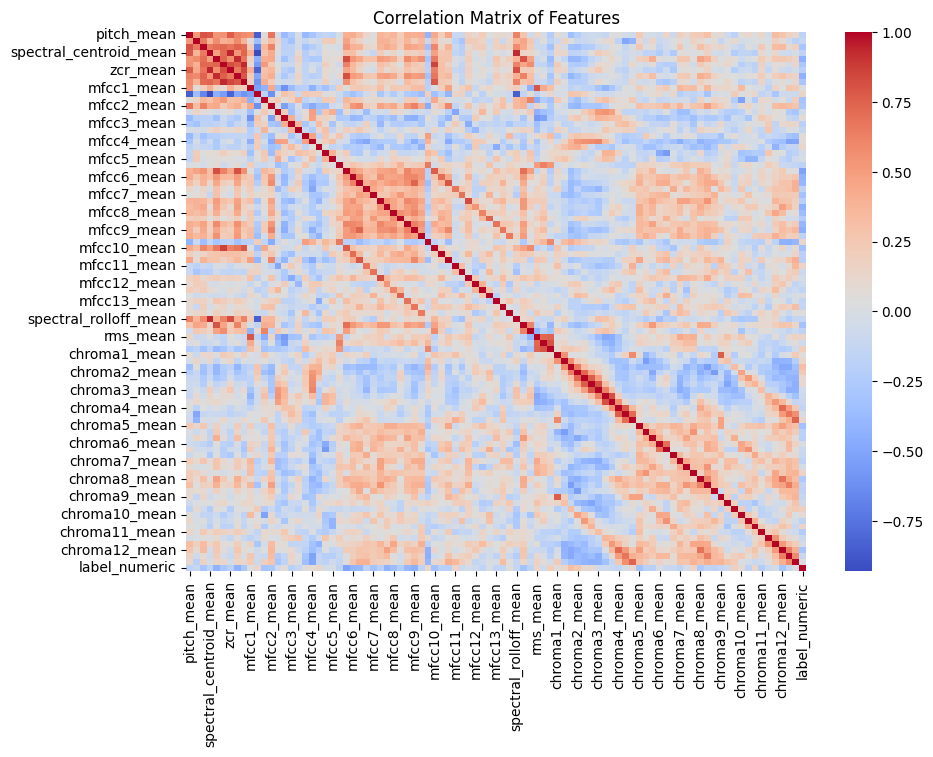

In [43]:
# Calculate correlation matrix
correlation_matrix = df59_numeric.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

#correlation_matrix

###Box Plots

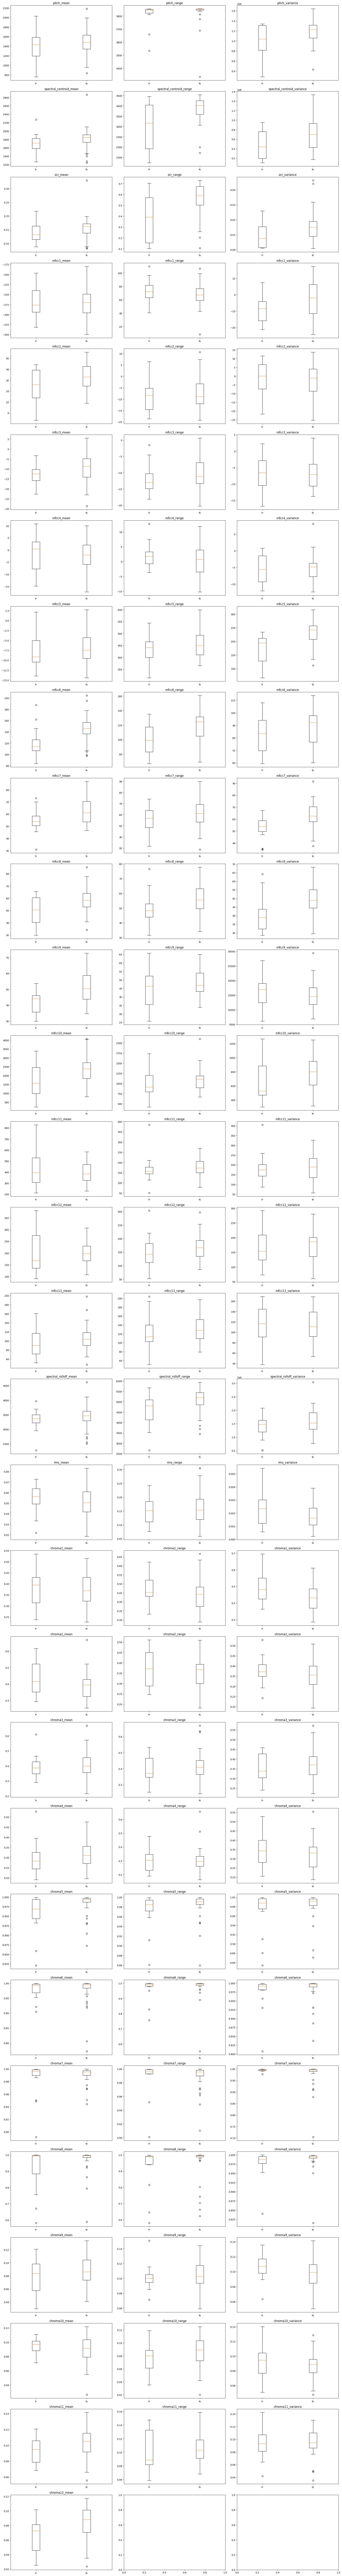

In [44]:
# Plotting boxplots for each feature with 3 in a row

n_features = flattened_features.shape[1]
n_rows = (n_features // 3) + (1 if n_features % 3 else 0)

fig, axes = plt.subplots(n_rows, 3, figsize=(20, 5 * n_rows))
axes = axes.flatten()


# Create groups based on 'label' column
group_A = df59[df59['label'] == 'A']
group_B = df59[df59['label'] == 'B']


# Ensuring we plot only existing features, use actual column names
# Iterate through column names except 'label' and 'label_numeric'
for i, col in enumerate(df.columns[:-2]):
    axes[i].boxplot([group_A[col], group_B[col]], labels=['A', 'B'])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=45)


# Hide any unused subplots
for j in range(n_features, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



##Step 2: Check for 20 top features correlation

# Correlation

In [45]:
df59_numeric.shape

(59, 91)

In [46]:
df59_numeric.head()

,pitch_mean,pitch_range,pitch_variance,spectral_centroid_mean,spectral_centroid_range,spectral_centroid_variance,zcr_mean,zcr_range,zcr_variance,mfcc1_mean,...,chroma10_mean,chroma10_range,chroma10_variance,chroma11_mean,chroma11_range,chroma11_variance,chroma12_mean,chroma12_range,chroma12_variance,label_numeric
0,1884.342407,3850.714111,1.315679e+06,1982.630571,4229.737449,644171.920108,0.168069,0.696289,0.015241,-217.609802,...,0.097918,0.100561,0.095429,0.099164,0.115840,0.107907,0.088173,0.096639,0.107229,0
1,1478.033691,3837.993164,1.082023e+06,1533.012237,3836.558170,410742.526834,0.115537,0.520020,0.008149,-252.016754,...,0.100791,0.075960,0.101367,0.134209,0.111662,0.130047,0.116011,0.107788,0.075431,0
2,954.271545,3850.890137,9.336337e+05,1244.303361,4019.060176,392822.836906,0.083970,0.566406,0.006597,-349.487305,...,0.097323,0.106252,0.085721,0.114890,0.148174,0.105001,0.072174,0.078031,0.086636,0
3,1267.060669,3688.528809,8.812799e+05,1397.077756,1716.149114,174312.047613,0.087981,0.203613,0.002055,-289.173584,...,0.114717,0.123535,0.120421,0.093674,0.118986,0.087069,0.110158,0.097373,0.094243,0
4,1480.912964,3838.001221,1.066563e+06,1660.515798,3228.356089,388791.240364,0.131794,0.546387,0.009720,-290.545502,...,0.106624,0.119503,0.128351,0.086163,0.099876,0.096231,0.106282,0.068597,0.058655,0


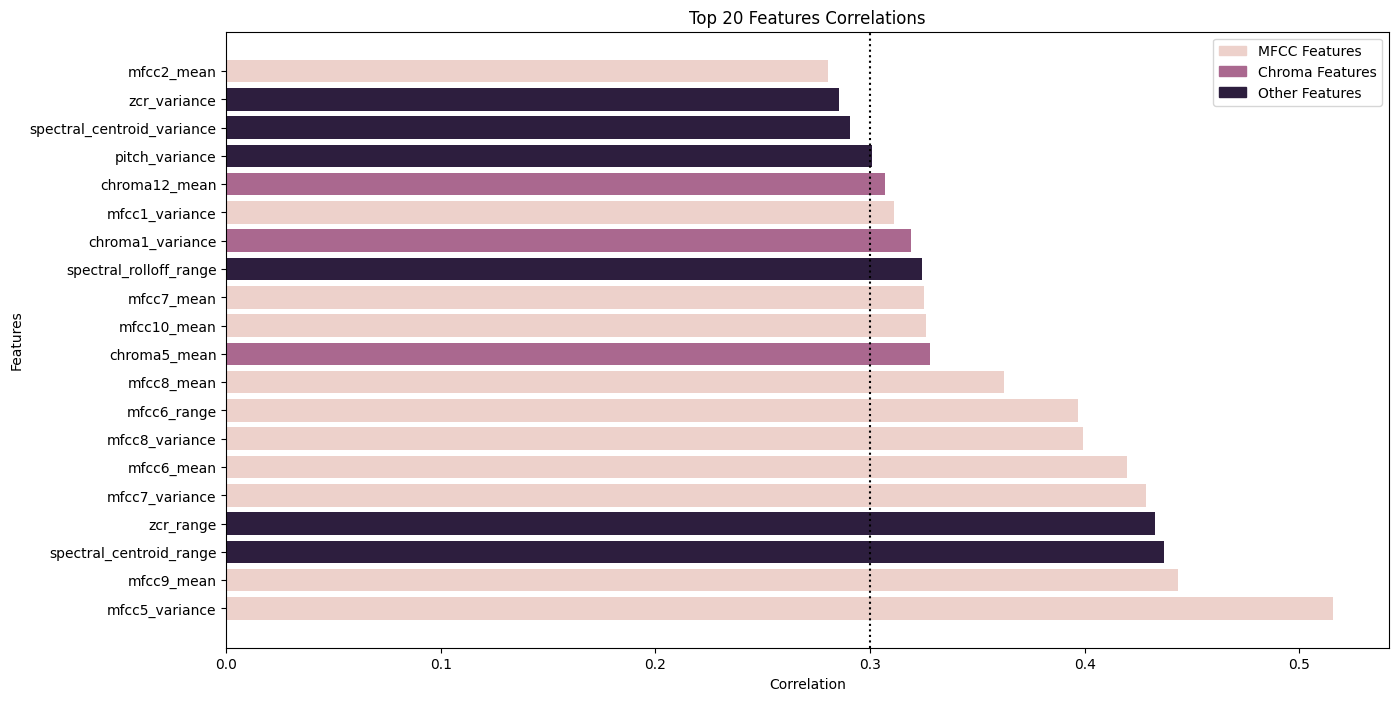

In [47]:

correlation = df59_numeric.corr()

# Extract the correlation of each feature with the label
feature_correlations = correlation['label_numeric'].drop('label_numeric').abs()

# Sort correlations from highest to lowest and filter top 20
sorted_feature_correlations = feature_correlations.sort_values(ascending=False).head(20)

# Define colors for the bars
colors = []
# Generate cubehelix palette colors
colors3 = sns.cubehelix_palette(n_colors=3)

for feature_name in sorted_feature_correlations.index:
    if 'mfcc' in feature_name:
        colors.append(colors3[0])
    elif 'chroma' in feature_name:
        colors.append(colors3[1])
    else:
        colors.append(colors3[2])

# Create a horizontal bar plot
plt.figure(figsize=(15, 8))
bars = plt.barh(sorted_feature_correlations.index, sorted_feature_correlations.values, color=colors)

# Add a vertical line at x=0.3
plt.axvline(x=0.3, color='black', linestyle=':')

# Create custom legend
import matplotlib.patches as mpatches
mfcc_patch = mpatches.Patch(color=colors3[0], label='MFCC Features')
chroma_patch = mpatches.Patch(color=colors3[1], label='Chroma Features')
other_patch = mpatches.Patch(color=colors3[2], label='Other Features')
plt.legend(handles=[mfcc_patch, chroma_patch, other_patch], loc='best')

plt.title('Top 20 Features Correlations')
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.show()


In [48]:
feature_correlations

pitch_mean                 0.163805
pitch_range                0.110374
pitch_variance             0.300950
spectral_centroid_mean     0.164602
spectral_centroid_range    0.436720
                             ...   
chroma11_range             0.098244
chroma11_variance          0.021778
chroma12_mean              0.307039
chroma12_range             0.111965
chroma12_variance          0.016734
Name: label_numeric, Length: 90, dtype: float64

# Logistic Regression

In [49]:
# Separate features and labels
y = df59_numeric['label_numeric']
X = df59_numeric.drop(columns=['label_numeric'])

In [50]:
y.shape

(59,)

In [51]:
X.shape

(59, 90)

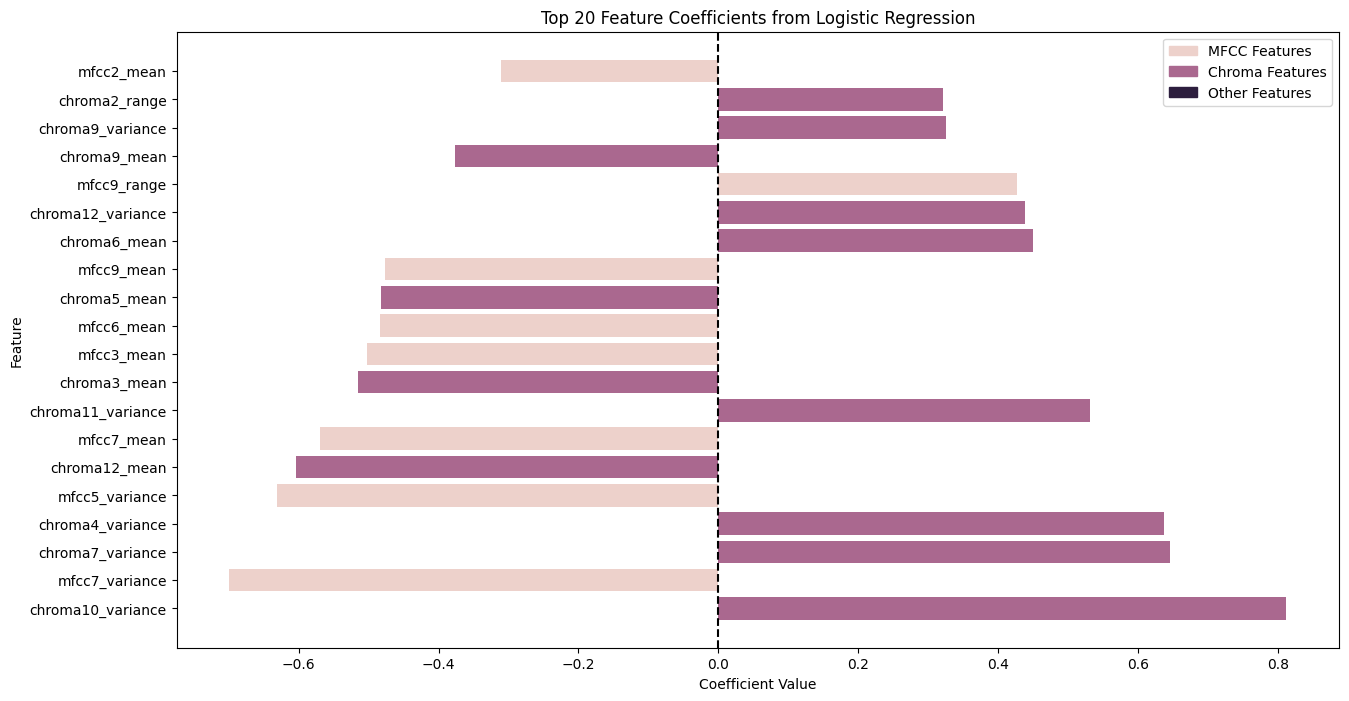

In [52]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit the logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_scaled, y)

# Extract the coefficients
coefficients = logreg.coef_[0]

# Create a DataFrame for the coefficients
coeff_df = pd.DataFrame({
    'Feature': flattened_feature_names,
    'Coefficient': coefficients
})


# Sort the coefficients by absolute value
coeff_df['AbsCoefficient'] = coeff_df['Coefficient'].abs()
coeff_df = coeff_df.sort_values(by='AbsCoefficient', ascending=False)

# Define colors for the bars
colors = []
# Generate cubehelix palette colors
colors3 = sns.cubehelix_palette(n_colors=3)

for feature_name in coeff_df['Feature']:
    if 'mfcc' in feature_name:
        colors.append(colors3[0])
    elif 'chroma' in feature_name:
        colors.append(colors3[1])
    else:
        colors.append(colors3[2])

# Create the bar plot
plt.figure(figsize=(15, 8))
bars = plt.barh(coeff_df.head(20)['Feature'], coeff_df.head(20)['Coefficient'], color=colors[:20])

# Add a vertical line at x=0
plt.axvline(x=0, color='black', linestyle='--')

# Create custom legend
import matplotlib.patches as mpatches
mfcc_patch = mpatches.Patch(color=colors3[0], label='MFCC Features')
chroma_patch = mpatches.Patch(color=colors3[1], label='Chroma Features')
other_patch = mpatches.Patch(color=colors3[2], label='Other Features')
plt.legend(handles=[mfcc_patch, chroma_patch, other_patch], loc='best')

plt.title('Top 20 Feature Coefficients from Logistic Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()


In [53]:
coeff_df

,Feature,Coefficient,AbsCoefficient
83,chroma10_variance,0.811686,0.811686
29,mfcc7_variance,-0.699104,0.699104
74,chroma7_variance,0.646041,0.646041
65,chroma4_variance,0.637590,0.637590
23,mfcc5_variance,-0.630539,0.630539
...,...,...,...
10,mfcc1_range,-0.021430,0.021430
26,mfcc6_variance,-0.019677,0.019677
11,mfcc1_variance,-0.013152,0.013152
77,chroma8_variance,0.012874,0.012874


#Random Forest

Confusion Matrix:


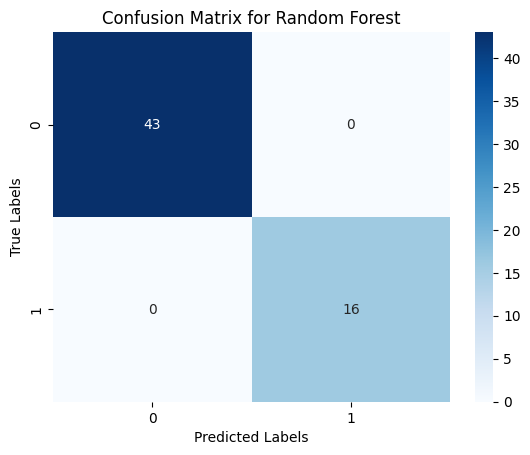


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        16

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



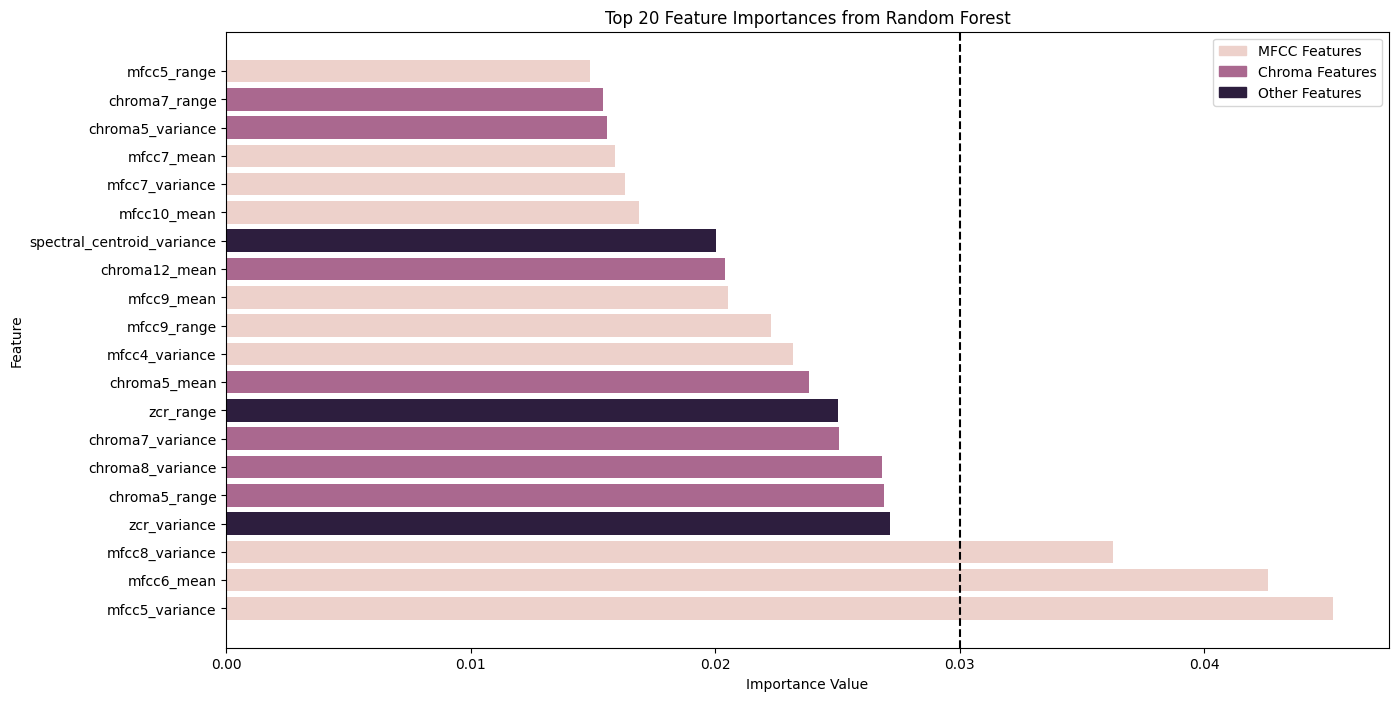

In [54]:
# Separate features and labels
#X = df.drop(columns=['label', 'label_numeric'])
#y = df['label_numeric']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit the Random Forest model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_scaled, y)

# Make predictions
y_pred = rf_clf.predict(X_scaled)

# Evaluate the model
print("Confusion Matrix:")
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Random Forest")
plt.show()

print("\nClassification Report:")
print(classification_report(y, y_pred))

# Extract the feature importances
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Create a DataFrame for the feature importances
importances_df = pd.DataFrame({
    'Feature': flattened_feature_names,
    'Importance': importances
})


# Sort the feature importances by value
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Define colors for the bars
colors = []
# Generate cubehelix palette colors
colors3 = sns.cubehelix_palette(n_colors=3)

for feature_name in importances_df['Feature']:
    if 'mfcc' in feature_name:
        colors.append(colors3[0])
    elif 'chroma' in feature_name:
        colors.append(colors3[1])
    else:
        colors.append(colors3[2])

# Create the bar plot
plt.figure(figsize=(15, 8))
bars = plt.barh(importances_df.head(20)['Feature'], importances_df.head(20)['Importance'], color=colors[:20])

# Add a vertical line at x=0
plt.axvline(x=0.03, color='black', linestyle='--')


# Create custom legend
import matplotlib.patches as mpatches
mfcc_patch = mpatches.Patch(color=colors3[0], label='MFCC Features')
chroma_patch = mpatches.Patch(color=colors3[1], label='Chroma Features')
other_patch = mpatches.Patch(color=colors3[2], label='Other Features')
plt.legend(handles=[mfcc_patch, chroma_patch, other_patch], loc='best')

plt.title('Top 20 Feature Importances from Random Forest')
plt.xlabel('Importance Value')
plt.ylabel('Feature')
plt.show()


In [55]:
#Correlation
feature_correlations

pitch_mean                 0.163805
pitch_range                0.110374
pitch_variance             0.300950
spectral_centroid_mean     0.164602
spectral_centroid_range    0.436720
                             ...   
chroma11_range             0.098244
chroma11_variance          0.021778
chroma12_mean              0.307039
chroma12_range             0.111965
chroma12_variance          0.016734
Name: label_numeric, Length: 90, dtype: float64

In [56]:
df_correlations = pd.DataFrame({
    'feature': feature_correlations.index,  # Use the index of the Series as 'feature' column
    'correlation_coeff': feature_correlations.values  # Use the values of the Series as 'correlation_coeff' column
})

df_correlations.head()

,feature,correlation_coeff
0,pitch_mean,0.163805
1,pitch_range,0.110374
2,pitch_variance,0.300950
3,spectral_centroid_mean,0.164602
4,spectral_centroid_range,0.436720


In [57]:
#Logistic Regression
coeff_df

,Feature,Coefficient,AbsCoefficient
83,chroma10_variance,0.811686,0.811686
29,mfcc7_variance,-0.699104,0.699104
74,chroma7_variance,0.646041,0.646041
65,chroma4_variance,0.637590,0.637590
23,mfcc5_variance,-0.630539,0.630539
...,...,...,...
10,mfcc1_range,-0.021430,0.021430
26,mfcc6_variance,-0.019677,0.019677
11,mfcc1_variance,-0.013152,0.013152
77,chroma8_variance,0.012874,0.012874


In [58]:
# Create new DataFrame with 'feature' and 'logistic_coeff' columns
df_logistic = coeff_df[['Feature', 'AbsCoefficient']].rename(columns={'Feature': 'feature', 'AbsCoefficient': 'logistic_coeff'})

print(df_logistic)

                       feature  logistic_coeff
83           chroma10_variance        0.811686
29              mfcc7_variance        0.699104
74            chroma7_variance        0.646041
65            chroma4_variance        0.637590
23              mfcc5_variance        0.630539
..                         ...             ...
10                 mfcc1_range        0.021430
26              mfcc6_variance        0.019677
11              mfcc1_variance        0.013152
77            chroma8_variance        0.012874
5   spectral_centroid_variance        0.010248

[90 rows x 2 columns]


In [59]:
#Random Forest model
importances_df

,Feature,Importance
23,mfcc5_variance,0.045291
24,mfcc6_mean,0.042612
32,mfcc8_variance,0.036274
8,zcr_variance,0.027167
67,chroma5_range,0.026908
...,...,...
58,chroma2_range,0.002780
52,rms_range,0.002009
81,chroma10_mean,0.001780
78,chroma9_mean,0.000666


In [60]:

# Create new DataFrame with 'feature' and 'RandomForest_Importance' columns
df_random_forest = importances_df.rename(columns={'Feature': 'feature', 'Importance': 'RandomForest_Importance'})

print(df_random_forest)

           feature  RandomForest_Importance
23  mfcc5_variance                 0.045291
24      mfcc6_mean                 0.042612
32  mfcc8_variance                 0.036274
8     zcr_variance                 0.027167
67   chroma5_range                 0.026908
..             ...                      ...
58   chroma2_range                 0.002780
52       rms_range                 0.002009
81   chroma10_mean                 0.001780
78    chroma9_mean                 0.000666
19     mfcc4_range                 0.000000

[90 rows x 2 columns]


In [61]:
df_correlations.head()

,feature,correlation_coeff
0,pitch_mean,0.163805
1,pitch_range,0.110374
2,pitch_variance,0.300950
3,spectral_centroid_mean,0.164602
4,spectral_centroid_range,0.436720


In [62]:
df_logistic.head()

,feature,logistic_coeff
83,chroma10_variance,0.811686
29,mfcc7_variance,0.699104
74,chroma7_variance,0.646041
65,chroma4_variance,0.637590
23,mfcc5_variance,0.630539


In [63]:
df_random_forest.head()

,feature,RandomForest_Importance
23,mfcc5_variance,0.045291
24,mfcc6_mean,0.042612
32,mfcc8_variance,0.036274
8,zcr_variance,0.027167
67,chroma5_range,0.026908


In [64]:
# Merging df_correlations and df_logistic on 'feature'
combined_df = pd.merge(df_correlations, df_logistic, on='feature', how='outer')

# Merging the result with df_random_forest on 'feature'
combined_df = pd.merge(combined_df, df_random_forest, on='feature', how='outer')

# Display the combined DataFrame
print("Combined Features Importance") # Print a descriptive title
display(combined_df) # Use the display() function to show the dataframe in a Jupyter notebook

Combined Features Importance


,feature,correlation_coeff,logistic_coeff,RandomForest_Importance
0,pitch_mean,0.163805,0.229286,0.011518
1,pitch_range,0.110374,0.220638,0.003093
2,pitch_variance,0.300950,0.161353,0.014178
3,spectral_centroid_mean,0.164602,0.048571,0.006979
4,spectral_centroid_range,0.436720,0.148250,0.013074
...,...,...,...,...
85,chroma11_range,0.098244,0.281470,0.008981
86,chroma11_variance,0.021778,0.530517,0.006243
87,chroma12_mean,0.307039,0.604016,0.020406
88,chroma12_range,0.111965,0.263752,0.012412


In [65]:
from sklearn.preprocessing import MinMaxScaler

# Select the columns to be scaled
columns_to_scale = ['correlation_coeff', 'logistic_coeff', 'RandomForest_Importance']

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the columns
combined_df[columns_to_scale] = scaler.fit_transform(combined_df[columns_to_scale])

# Calculate the average score
combined_df['score'] = combined_df[columns_to_scale].mean(axis=1)

In [66]:
combined_df

,feature,correlation_coeff,logistic_coeff,RandomForest_Importance,score
0,pitch_mean,0.315082,0.273306,0.254316,0.280901
1,pitch_range,0.211141,0.262516,0.068294,0.180650
2,pitch_variance,0.581869,0.188542,0.313036,0.361149
3,spectral_centroid_mean,0.316632,0.047817,0.154092,0.172847
4,spectral_centroid_range,0.845982,0.172192,0.288662,0.435612
...,...,...,...,...,...
85,chroma11_range,0.187545,0.338418,0.198294,0.241419
86,chroma11_variance,0.038797,0.649169,0.137851,0.275272
87,chroma12_mean,0.593714,0.740879,0.450551,0.595048
88,chroma12_range,0.214238,0.316311,0.274040,0.268196


In [67]:
combined_df.head()

,feature,correlation_coeff,logistic_coeff,RandomForest_Importance,score
0,pitch_mean,0.315082,0.273306,0.254316,0.280901
1,pitch_range,0.211141,0.262516,0.068294,0.180650
2,pitch_variance,0.581869,0.188542,0.313036,0.361149
3,spectral_centroid_mean,0.316632,0.047817,0.154092,0.172847
4,spectral_centroid_range,0.845982,0.172192,0.288662,0.435612


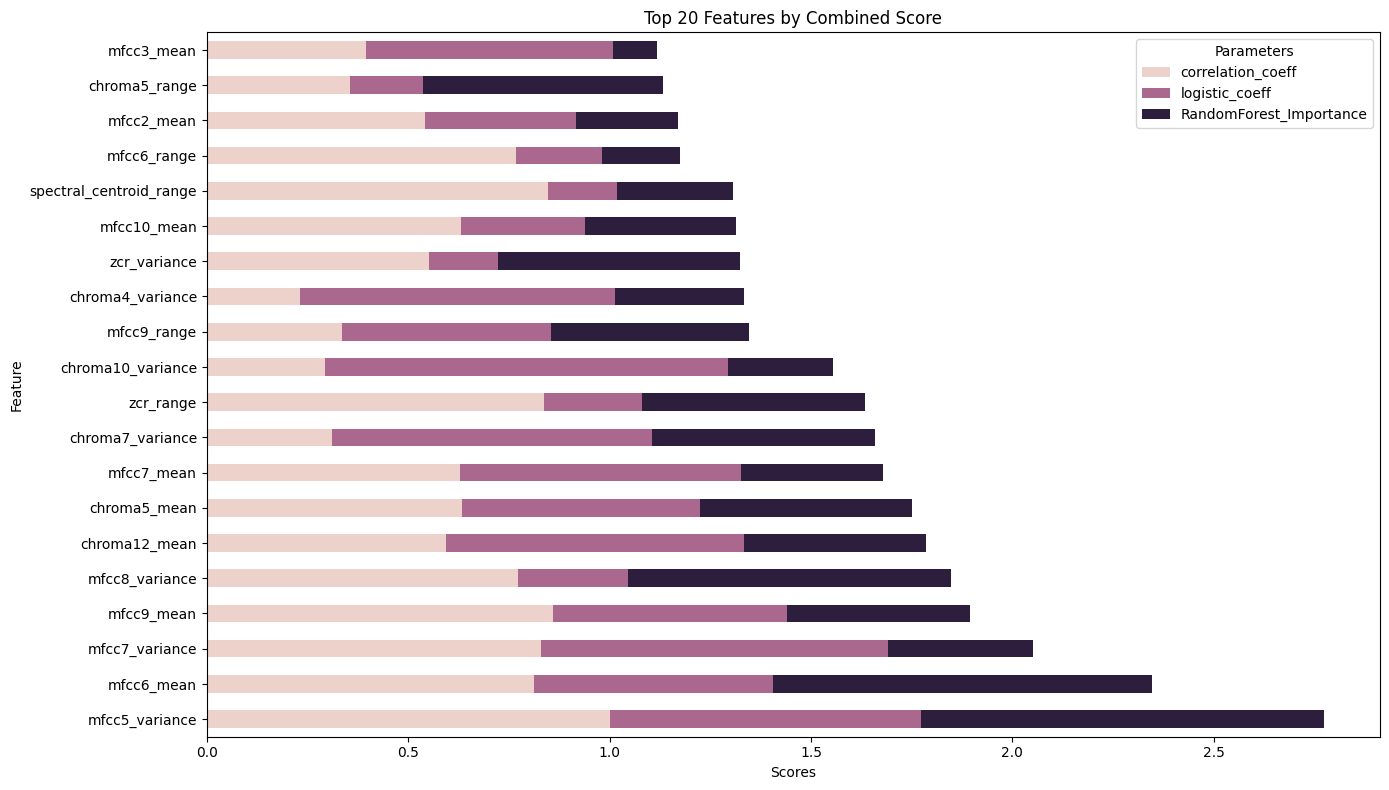

In [68]:
# Sort by the 'score' column
sorted_combined_df = combined_df.sort_values(by='score', ascending=False).head(20)

# Generate cubehelix palette colors
colors3 = sns.cubehelix_palette(n_colors=3)

# Plotting the top 20 features as a horizontal bar chart with specified colors
sorted_combined_df[['correlation_coeff', 'logistic_coeff', 'RandomForest_Importance']].plot(kind='barh', stacked=True, figsize=(14, 8), color=colors3)

plt.title('Top 20 Features by Combined Score')
plt.xlabel('Scores')
plt.ylabel('Feature')
plt.legend(title='Parameters')
plt.yticks(ticks=range(len(sorted_combined_df)), labels=sorted_combined_df['feature'])
plt.tight_layout()
plt.show()

#Clustering

In [69]:
df.shape

(59, 90)

In [70]:
df.head()

,pitch_mean,pitch_range,pitch_variance,spectral_centroid_mean,spectral_centroid_range,spectral_centroid_variance,zcr_mean,zcr_range,zcr_variance,mfcc1_mean,...,chroma9_variance,chroma10_mean,chroma10_range,chroma10_variance,chroma11_mean,chroma11_range,chroma11_variance,chroma12_mean,chroma12_range,chroma12_variance
0,1884.342407,3850.714111,1.315679e+06,1982.630571,4229.737449,644171.920108,0.168069,0.696289,0.015241,-217.609802,...,0.093980,0.097918,0.100561,0.095429,0.099164,0.115840,0.107907,0.088173,0.096639,0.107229
1,1478.033691,3837.993164,1.082023e+06,1533.012237,3836.558170,410742.526834,0.115537,0.520020,0.008149,-252.016754,...,0.084143,0.100791,0.075960,0.101367,0.134209,0.111662,0.130047,0.116011,0.107788,0.075431
2,954.271545,3850.890137,9.336337e+05,1244.303361,4019.060176,392822.836906,0.083970,0.566406,0.006597,-349.487305,...,0.098973,0.097323,0.106252,0.085721,0.114890,0.148174,0.105001,0.072174,0.078031,0.086636
3,1267.060669,3688.528809,8.812799e+05,1397.077756,1716.149114,174312.047613,0.087981,0.203613,0.002055,-289.173584,...,0.122809,0.114717,0.123535,0.120421,0.093674,0.118986,0.087069,0.110158,0.097373,0.094243
4,1480.912964,3838.001221,1.066563e+06,1660.515798,3228.356089,388791.240364,0.131794,0.546387,0.009720,-290.545502,...,0.091397,0.106624,0.119503,0.128351,0.086163,0.099876,0.096231,0.106282,0.068597,0.058655


# K-Means Clustering

k=2

##K-Means Clustering with 2 PCA Components

In [71]:
flattened_features.shape

(59, 90)

In [72]:
df59_numeric.shape

(59, 91)

In [73]:
#feature_name =
#df59_features.columns

In [74]:
# Extract the only the features, no labels
data = df59_numeric.iloc[:, :90].values

In [75]:
data.shape

(59, 90)

###K-means Clustering with k=2 and Calculation of the Silhouette Score

In [76]:
# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [77]:
# Perform K-means clustering with k=2
kmeans_2 = KMeans(n_clusters=2, random_state=0)
labels_2 = kmeans_2.fit_predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [78]:
# Calculate the Silhouette Score for k=2
silhouette_avg_2 = silhouette_score(scaled_data, labels_2)
print(f'Silhouette Score for k=2: {silhouette_avg_2}')

Silhouette Score for k=2: 0.19336124841679223


In [79]:
# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
pca_components_2 = pca.fit_transform(scaled_data)


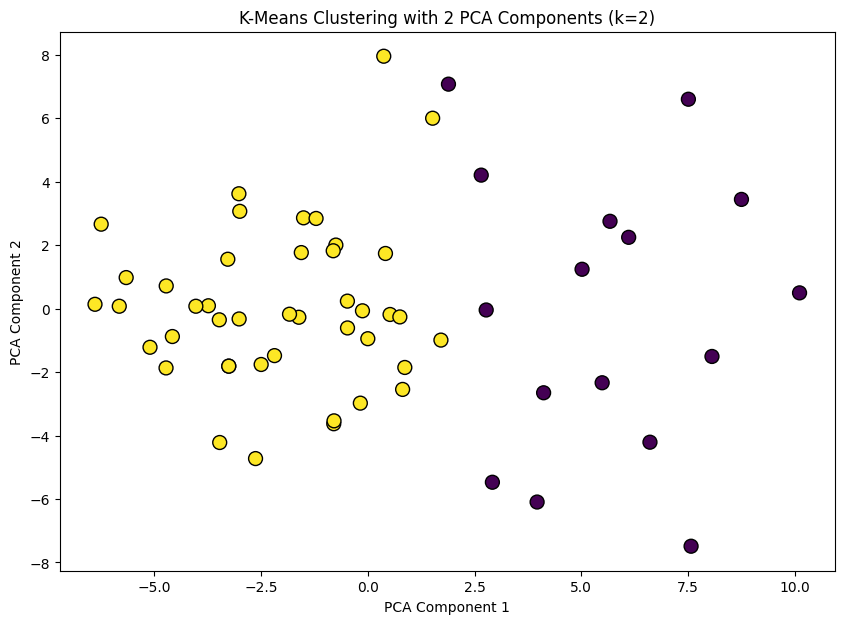

In [80]:
# Create a scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(pca_components_2[:, 0], pca_components_2[:, 1], c=labels_2, cmap='viridis', marker='o', edgecolor='k', s=100)

# Label the axes
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Title and show plot
plt.title('K-Means Clustering with 2 PCA Components (k=2)')
plt.show()


We can see a clear Distinction Between Clusters:

The features used for clustering effectively capture the differences between the data points, leading to distinct and well-separated groups.

This suggests that the chosen features are highly discriminative for the clustering task.

###K-means Clustering with k=3 and Visualization


In [81]:
# Perform K-means clustering with k=3
kmeans_3 = KMeans(n_clusters=3, random_state=0)
labels_3 = kmeans_3.fit_predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [82]:
# Calculate the Silhouette Score for k=3
silhouette_avg_3 = silhouette_score(scaled_data, labels_3)
print(f'Silhouette Score for k=3: {silhouette_avg_3}')

Silhouette Score for k=3: 0.10485728353589199


In [83]:
# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
pca_components_3 = pca.fit_transform(scaled_data)

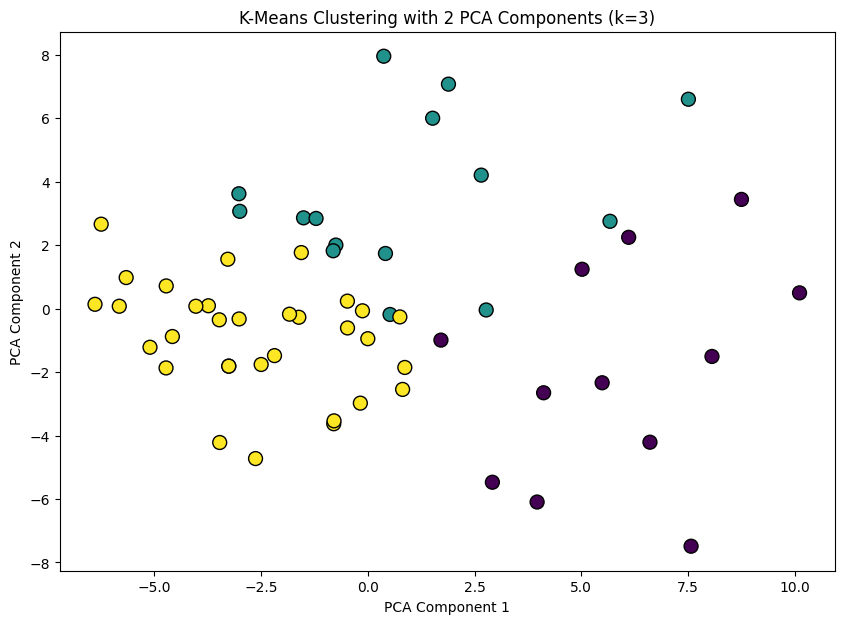

In [84]:
# Create a scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(pca_components_3[:, 0], pca_components_3[:, 1], c=labels_3, cmap='viridis', marker='o', edgecolor='k', s=100)

# Label the axes
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Title and show plot
plt.title('K-Means Clustering with 2 PCA Components (k=3)')
plt.show()


Silhouette Score for k=3: 0.1836

Silhouette Score for k=2: 0.1866


A silhouette score of 0.18 indicates that the clustering result might not be very strong.

It looks like the Silhouette Scores for both k=2 and k=3 are relatively low, with k=2 having a slightly higher score. This suggests that k=2 might be a better choice for clustering, but overall, the clusters are not very well-defined.

From now on, i will refer k=2


### Assign Cluster Labels to the Data


In [85]:
df59['Cluster_2'] = labels_2
df59_numeric['Cluster_2'] = labels_2

In [86]:
df59.head()

,pitch_mean,pitch_range,pitch_variance,spectral_centroid_mean,spectral_centroid_range,spectral_centroid_variance,zcr_mean,zcr_range,zcr_variance,mfcc1_mean,...,chroma11_mean,chroma11_range,chroma11_variance,chroma12_mean,chroma12_range,chroma12_variance,file_name,label,label_numeric,Cluster_2
0,1884.342407,3850.714111,1.315679e+06,1982.630571,4229.737449,644171.920108,0.168069,0.696289,0.015241,-217.609802,...,0.099164,0.115840,0.107907,0.088173,0.096639,0.107229,33,B,0,1
1,1478.033691,3837.993164,1.082023e+06,1533.012237,3836.558170,410742.526834,0.115537,0.520020,0.008149,-252.016754,...,0.134209,0.111662,0.130047,0.116011,0.107788,0.075431,56,B,0,1
2,954.271545,3850.890137,9.336337e+05,1244.303361,4019.060176,392822.836906,0.083970,0.566406,0.006597,-349.487305,...,0.114890,0.148174,0.105001,0.072174,0.078031,0.086636,58,B,0,1
3,1267.060669,3688.528809,8.812799e+05,1397.077756,1716.149114,174312.047613,0.087981,0.203613,0.002055,-289.173584,...,0.093674,0.118986,0.087069,0.110158,0.097373,0.094243,57,B,0,0
4,1480.912964,3838.001221,1.066563e+06,1660.515798,3228.356089,388791.240364,0.131794,0.546387,0.009720,-290.545502,...,0.086163,0.099876,0.096231,0.106282,0.068597,0.058655,55,B,0,1


In [87]:
# Calculate the mean and standard deviation of each feature within each cluster
cluster_2_summary = df59_numeric.groupby('Cluster_2').agg(['mean', 'std'])
print(cluster_2_summary)


            pitch_mean              pitch_range             pitch_variance  \
                  mean         std         mean         std           mean   
Cluster_2                                                                    
0          1197.149200  234.115839  3762.553238  145.182929   8.730514e+05   
1          1571.384466  241.365835  3849.864837    5.368474   1.226268e+06   

                         spectral_centroid_mean              \
                     std                   mean         std   
Cluster_2                                                     
0          333742.295716            1628.707752  201.610282   
1          179596.042302            1841.373771  253.979967   

          spectral_centroid_range              ... chroma11_variance  \
                             mean         std  ...              mean   
Cluster_2                                      ...                     
0                     2579.516846  983.389525  ...          0.079862   
1    

###Boxplots - the most discriminative features (for the clustering task)

In [88]:
from scipy.stats import ttest_ind

In [89]:
df59_features = df59_numeric.drop(columns=['label_numeric','Cluster_2'])

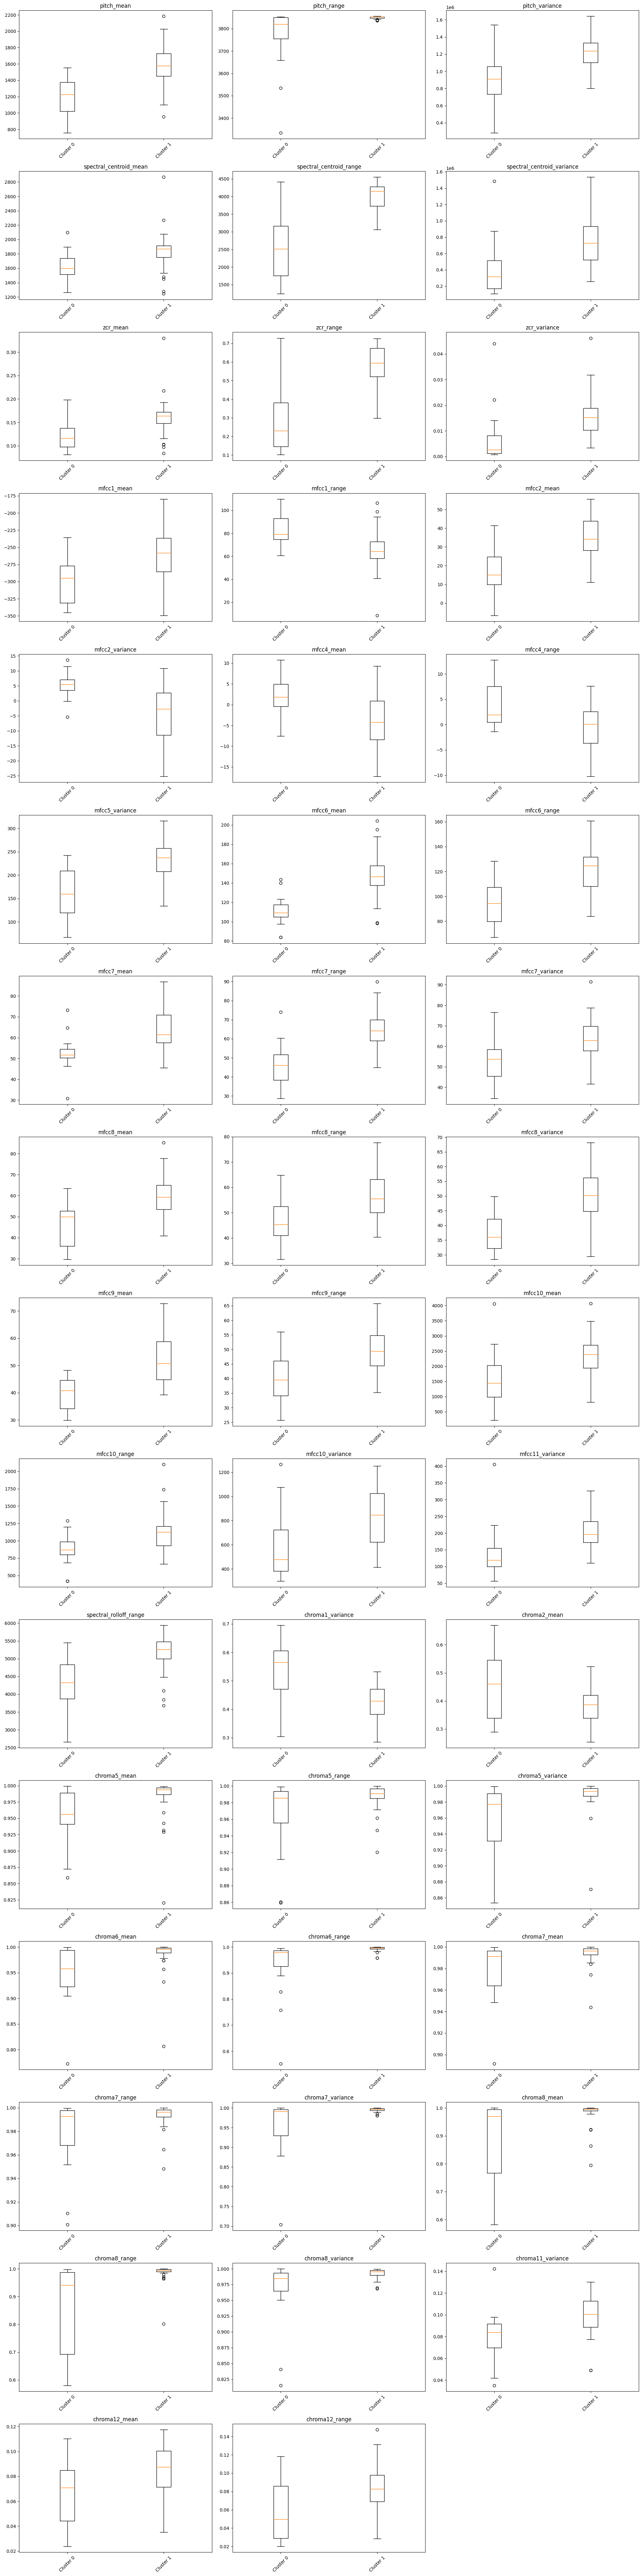

In [90]:
# Threshold for significance
p_value_threshold = 0.01

# Get the number of features
n_features = df59_features.shape[1]

# Lists to store significant features and their indices
significant_features = []
significant_indices = []

# Create groups based on 'Cluster_2' column
group_0 = df59_numeric[df59_numeric['Cluster_2'] == 0]
group_1 = df59_numeric[df59_numeric['Cluster_2'] == 1]

# Iterate through column names
for i, col in enumerate(df59_features.columns):
    # Perform t-test between clusters
    t_stat, p_value = ttest_ind(group_0[col], group_1[col])
    if p_value < p_value_threshold:
        significant_features.append(col)
        significant_indices.append(i)

# Number of rows needed for the subplots
n_significant = len(significant_features)
n_rows = (n_significant // 3) + (1 if n_significant % 3 else 0)

fig, axes = plt.subplots(n_rows, 3, figsize=(20, 5 * n_rows))
axes = axes.flatten()

# Plot the significant features
for i, col in enumerate(significant_features):
    axes[i].boxplot([group_0[col], group_1[col]], labels=['Cluster 0', 'Cluster 1'])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=45)

# Hide any unused subplots
for j in range(n_significant, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

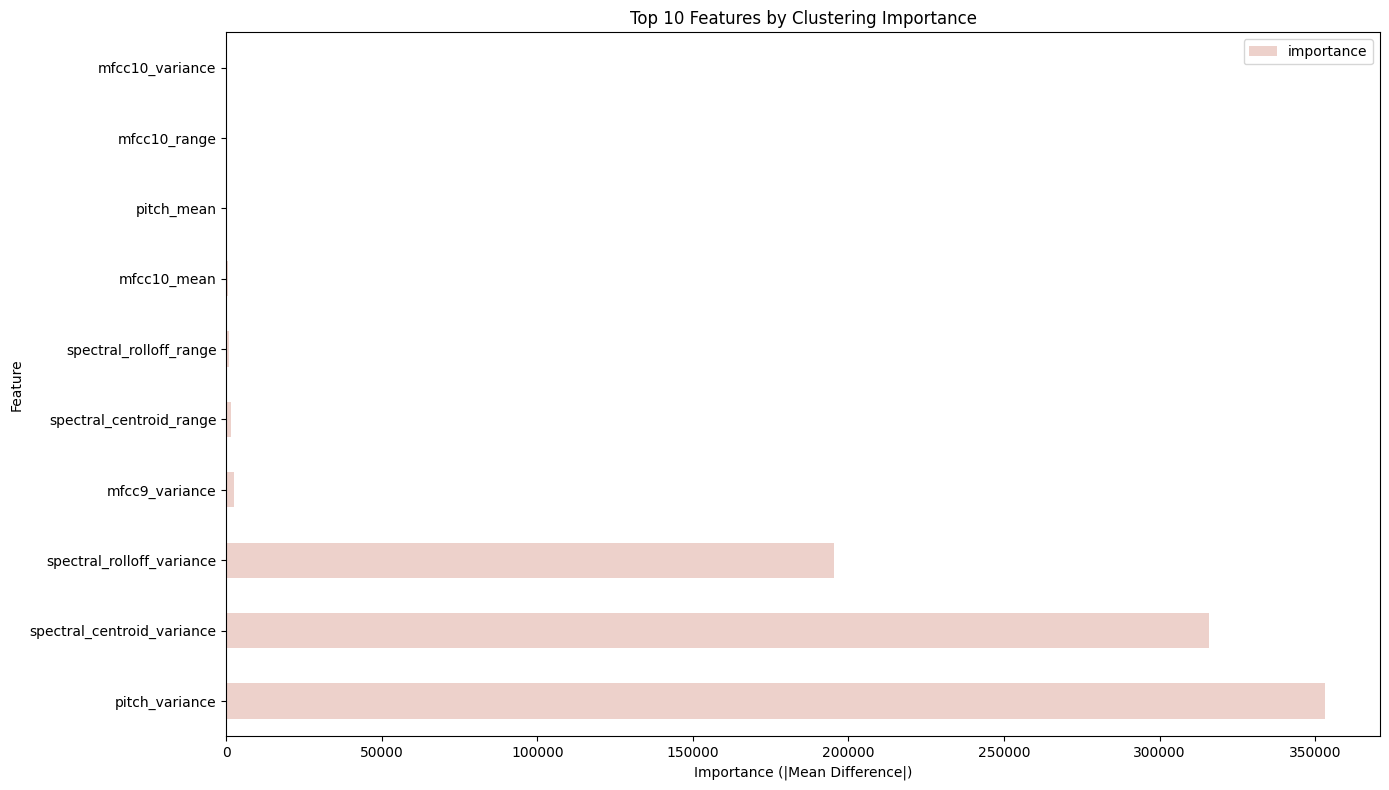

In [92]:

# Assuming df59_numeric and df59_features are already defined and contain the necessary data
# and 'Cluster_2' contains the cluster assignments

# Get the feature columns and the cluster assignments
features = df59_features.columns
cluster_labels = df59_numeric['Cluster_2']

# Calculate the mean of each feature for each cluster
cluster_means = df59_features.groupby(cluster_labels).mean()

# Calculate the absolute difference between the cluster means
feature_importance = np.abs(cluster_means.loc[0] - cluster_means.loc[1])

# Create a DataFrame for features and their importances
importance_df = pd.DataFrame({
    'feature': features,
    'importance': feature_importance
})

# Sort by importance
sorted_importance_df = importance_df.sort_values(by='importance', ascending=False).head(10)

# Plotting the top 20 features as a horizontal bar chart with specified colors
colors3 = sns.cubehelix_palette(n_colors=1)

sorted_importance_df.plot(kind='barh', x='feature', y='importance', figsize=(14, 8), color=colors3)

plt.title('Top 10 Features by Clustering Importance')
plt.xlabel('Importance (|Mean Difference|)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


# 2 Clusters Analysis

In [93]:
df.head()

,pitch_mean,pitch_range,pitch_variance,spectral_centroid_mean,spectral_centroid_range,spectral_centroid_variance,zcr_mean,zcr_range,zcr_variance,mfcc1_mean,...,chroma9_variance,chroma10_mean,chroma10_range,chroma10_variance,chroma11_mean,chroma11_range,chroma11_variance,chroma12_mean,chroma12_range,chroma12_variance
0,1884.342407,3850.714111,1.315679e+06,1982.630571,4229.737449,644171.920108,0.168069,0.696289,0.015241,-217.609802,...,0.093980,0.097918,0.100561,0.095429,0.099164,0.115840,0.107907,0.088173,0.096639,0.107229
1,1478.033691,3837.993164,1.082023e+06,1533.012237,3836.558170,410742.526834,0.115537,0.520020,0.008149,-252.016754,...,0.084143,0.100791,0.075960,0.101367,0.134209,0.111662,0.130047,0.116011,0.107788,0.075431
2,954.271545,3850.890137,9.336337e+05,1244.303361,4019.060176,392822.836906,0.083970,0.566406,0.006597,-349.487305,...,0.098973,0.097323,0.106252,0.085721,0.114890,0.148174,0.105001,0.072174,0.078031,0.086636
3,1267.060669,3688.528809,8.812799e+05,1397.077756,1716.149114,174312.047613,0.087981,0.203613,0.002055,-289.173584,...,0.122809,0.114717,0.123535,0.120421,0.093674,0.118986,0.087069,0.110158,0.097373,0.094243
4,1480.912964,3838.001221,1.066563e+06,1660.515798,3228.356089,388791.240364,0.131794,0.546387,0.009720,-290.545502,...,0.091397,0.106624,0.119503,0.128351,0.086163,0.099876,0.096231,0.106282,0.068597,0.058655


Inspect Cluster Centers: Examine the cluster centers to understand the average feature values for each cluster. This can give insights into the common characteristics of each group.

In [94]:
labels
#flattened_features
#flattened_feature_names

array(['B', 'B', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'A', 'B', 'B',
       'A', 'A', 'A', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'A', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'A', 'B', 'A', 'A', 'B', 'B', 'B', 'B', 'A', 'B', 'A', 'A',
       'A', 'A', 'B', 'B', 'B', 'B', 'B'], dtype='<U1')

In [95]:
#features_matrix_column_names

In [96]:
flattened_column_names = [item for sublist in features_matrix_column_names for item in sublist]


###Cluster Membership: Analyze which audio files belong to which cluster. This can help to understand what types of files are grouped together.

In [97]:
df59.head()

,pitch_mean,pitch_range,pitch_variance,spectral_centroid_mean,spectral_centroid_range,spectral_centroid_variance,zcr_mean,zcr_range,zcr_variance,mfcc1_mean,...,chroma11_mean,chroma11_range,chroma11_variance,chroma12_mean,chroma12_range,chroma12_variance,file_name,label,label_numeric,Cluster_2
0,1884.342407,3850.714111,1.315679e+06,1982.630571,4229.737449,644171.920108,0.168069,0.696289,0.015241,-217.609802,...,0.099164,0.115840,0.107907,0.088173,0.096639,0.107229,33,B,0,1
1,1478.033691,3837.993164,1.082023e+06,1533.012237,3836.558170,410742.526834,0.115537,0.520020,0.008149,-252.016754,...,0.134209,0.111662,0.130047,0.116011,0.107788,0.075431,56,B,0,1
2,954.271545,3850.890137,9.336337e+05,1244.303361,4019.060176,392822.836906,0.083970,0.566406,0.006597,-349.487305,...,0.114890,0.148174,0.105001,0.072174,0.078031,0.086636,58,B,0,1
3,1267.060669,3688.528809,8.812799e+05,1397.077756,1716.149114,174312.047613,0.087981,0.203613,0.002055,-289.173584,...,0.093674,0.118986,0.087069,0.110158,0.097373,0.094243,57,B,0,0
4,1480.912964,3838.001221,1.066563e+06,1660.515798,3228.356089,388791.240364,0.131794,0.546387,0.009720,-290.545502,...,0.086163,0.099876,0.096231,0.106282,0.068597,0.058655,55,B,0,1


In [98]:
df59_numeric.head()

,pitch_mean,pitch_range,pitch_variance,spectral_centroid_mean,spectral_centroid_range,spectral_centroid_variance,zcr_mean,zcr_range,zcr_variance,mfcc1_mean,...,chroma10_range,chroma10_variance,chroma11_mean,chroma11_range,chroma11_variance,chroma12_mean,chroma12_range,chroma12_variance,label_numeric,Cluster_2
0,1884.342407,3850.714111,1.315679e+06,1982.630571,4229.737449,644171.920108,0.168069,0.696289,0.015241,-217.609802,...,0.100561,0.095429,0.099164,0.115840,0.107907,0.088173,0.096639,0.107229,0,1
1,1478.033691,3837.993164,1.082023e+06,1533.012237,3836.558170,410742.526834,0.115537,0.520020,0.008149,-252.016754,...,0.075960,0.101367,0.134209,0.111662,0.130047,0.116011,0.107788,0.075431,0,1
2,954.271545,3850.890137,9.336337e+05,1244.303361,4019.060176,392822.836906,0.083970,0.566406,0.006597,-349.487305,...,0.106252,0.085721,0.114890,0.148174,0.105001,0.072174,0.078031,0.086636,0,1
3,1267.060669,3688.528809,8.812799e+05,1397.077756,1716.149114,174312.047613,0.087981,0.203613,0.002055,-289.173584,...,0.123535,0.120421,0.093674,0.118986,0.087069,0.110158,0.097373,0.094243,0,0
4,1480.912964,3838.001221,1.066563e+06,1660.515798,3228.356089,388791.240364,0.131794,0.546387,0.009720,-290.545502,...,0.119503,0.128351,0.086163,0.099876,0.096231,0.106282,0.068597,0.058655,0,1


In [99]:
# Create cluster_membership DataFrame with 'label' and 'Cluster_2' columns
cluster_membership = df59[['file_name', 'label', 'label_numeric', 'Cluster_2']].copy()


In [100]:
cluster_membership.sort_values(by='Cluster_2')

,file_name,label,label_numeric,Cluster_2
22,52,B,0,0
40,51,A,1,0
13,54,A,1,0
24,3,B,0,0
43,8,A,1,0
19,2,A,1,0
15,6,A,1,0
52,4,A,1,0
6,7,B,0,0
5,47,A,1,0


###Can we hear the Clastering?

Here some audios from cluster 0


In [101]:
from IPython.display import Audio

audio_file_path = 'content/audio-shorts/Telefon_59_parts/55B.wav'
Audio(filename=audio_file_path)


In [102]:
audio_file_path = 'content/audio-shorts/Telefon_59_parts/50B.wav'
Audio(filename=audio_file_path)

In [103]:
audio_file_path = 'content/audio-shorts/Telefon_59_parts/32A.wav'
Audio(filename=audio_file_path)

In [104]:
audio_file_path = 'content/audio-shorts/Telefon_59_parts/49A.wav'
Audio(filename=audio_file_path)

Here some audios from cluster 1

In [105]:
audio_file_path = 'content/audio-shorts/Telefon_59_parts/57B.wav'
Audio(filename=audio_file_path)


In [106]:
audio_file_path = 'content/audio-shorts/Telefon_59_parts/37B.wav'
Audio(filename=audio_file_path)

In [107]:
audio_file_path = 'content/audio-shorts/Telefon_59_parts/42A.wav'
Audio(filename=audio_file_path)

In [108]:
audio_file_path = 'content/audio-shorts/Telefon_59_parts/6A.wav'
Audio(filename=audio_file_path)

In [110]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

# Calculate cluster centroids
centroids = kmeans.cluster_centers_

# Reshape centroids to original feature shape (30, 3)
centroids_reshaped = centroids.reshape(2, 30, 3)

# Calculate differences between centroids
centroid_diff = np.abs(centroids_reshaped[0] - centroids_reshaped[1])

#features_column_names = [f"Feature {i}" for i in range(centroid_diff.shape[0])]

# Convert to DataFrame for easier interpretation
centroid_diff_df = pd.DataFrame(centroid_diff, index=features_matrix_rows_names, columns=['mean_diff', 'range_diff', 'variance_diff'])

# Identify features with the largest differences
important_features = centroid_diff_df.sort_values(by='mean_diff', ascending=False)
print("Important Features Contributing to Clustering:")
print(important_features)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Important Features Contributing to Clustering:
                                mean_diff   range_diff  variance_diff
feature13: MFCC10             1184.050509    96.689802      48.462213
feature17: Spectral Rolloff    223.819328   763.836235  675511.922875
feature1: Pitch                202.684343    58.609444  299237.618013
feature2: Spectral Centroid    188.674469  1048.635402  472662.846771
feature9: MFCC6                 11.599043     8.830803       2.217089
feature16: MFCC13                9.916575    14.579026       2.281255
feature4: MFCC1                  8.260307     6.645007      11.826505
feature15: MFCC12                6.276439     1.412479       3.119818
feature12: MFCC9                 4.173394     2.305947    3242.690462
feature5: MFCC2                  3.449305     2.997005       0.809579
feature14: MFCC11                2.293211     2.217906       5.038553
feature11: MFCC8                 2.290942     2.017638       5.248269
feature10: MFCC7                 2.152170  

<hr>

The K-Mean Clustering clustering analysis (k=2) shows that one of the clusters might captured one of the 'labeled' types.

###Another Clustering method: Hierarchical Clustering
Hierarchical clustering builds a hierarchy of clusters either in a bottom-up approach (agglomerative) or top-down approach (divisive). It is useful for understanding the structure of your data and can produce a dendrogram to visualize the clusters.

In [111]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


Silhouette Score for Hierarchical Clustering: 0.16618540323148448


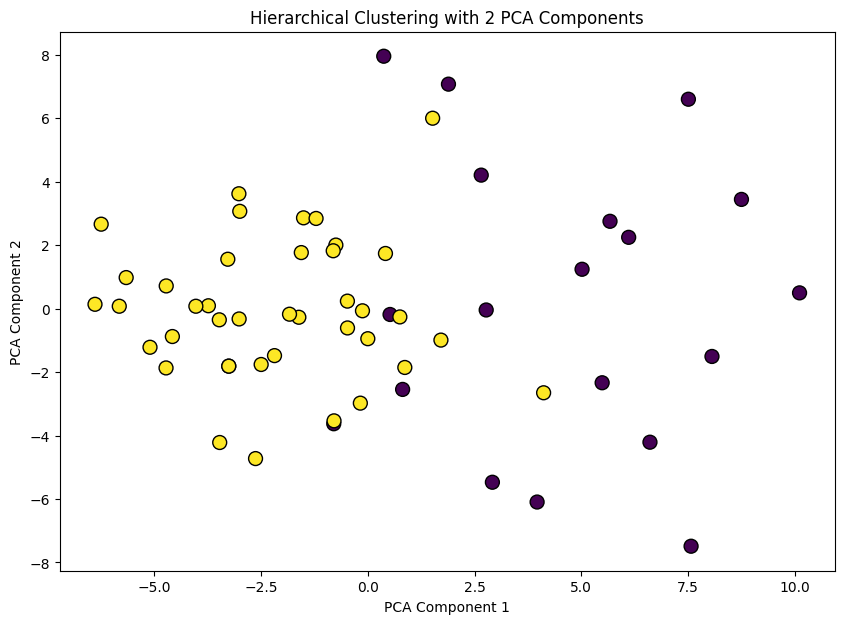

In [112]:

# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Perform Hierarchical Clustering with AgglomerativeClustering
hierarchical_clustering = AgglomerativeClustering(n_clusters=2)
labels_hc = hierarchical_clustering.fit_predict(scaled_data)

# Add the cluster labels to the original dataframe
df['Cluster_HC'] = labels_hc

# Apply PCA to reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)


# Calculate the Silhouette Score for hierarchical clustering
silhouette_avg_hc = silhouette_score(scaled_data, labels_hc)
print(f'Silhouette Score for Hierarchical Clustering: {silhouette_avg_hc}')

# Create a scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=labels_hc, cmap='viridis', marker='o', edgecolor='k', s=100)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Hierarchical Clustering with 2 PCA Components')
plt.show()




###Experiment with Different Linkage Methods


In [113]:
linkage_methods = ['ward', 'complete', 'average', 'single']
for method in linkage_methods:
    hierarchical_clustering = AgglomerativeClustering(n_clusters=2, linkage=method)
    labels_hc = hierarchical_clustering.fit_predict(scaled_data)
    silhouette_avg_hc = silhouette_score(scaled_data, labels_hc)
    print(f'Silhouette Score for Hierarchical Clustering with {method} linkage: {silhouette_avg_hc}')


Silhouette Score for Hierarchical Clustering with ward linkage: 0.16618540323148448
Silhouette Score for Hierarchical Clustering with complete linkage: 0.2333028446184153
Silhouette Score for Hierarchical Clustering with average linkage: 0.2582074158929005
Silhouette Score for Hierarchical Clustering with single linkage: 0.2582074158929005


In [114]:
# Function to test different numbers of clusters
def test_hierarchical_clustering(n_clusters):
    hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
    labels_hc = hierarchical_clustering.fit_predict(scaled_data)
    silhouette_avg_hc = silhouette_score(scaled_data, labels_hc)
    print(f'Silhouette Score for Hierarchical Clustering with {n_clusters} clusters: {silhouette_avg_hc}')
    return labels_hc, silhouette_avg_hc

# Test with 3 clusters
labels_hc_3, silhouette_avg_hc_3 = test_hierarchical_clustering(3)

# Test with 4 clusters
labels_hc_4, silhouette_avg_hc_4 = test_hierarchical_clustering(4)

# Continue testing with other numbers of clusters as needed


Silhouette Score for Hierarchical Clustering with 3 clusters: 0.20982446215402975
Silhouette Score for Hierarchical Clustering with 4 clusters: 0.19229978970310624


###2 clusters , 'average' linkage type

In [115]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

Silhouette Score for Hierarchical Clustering: 0.2582074158929005


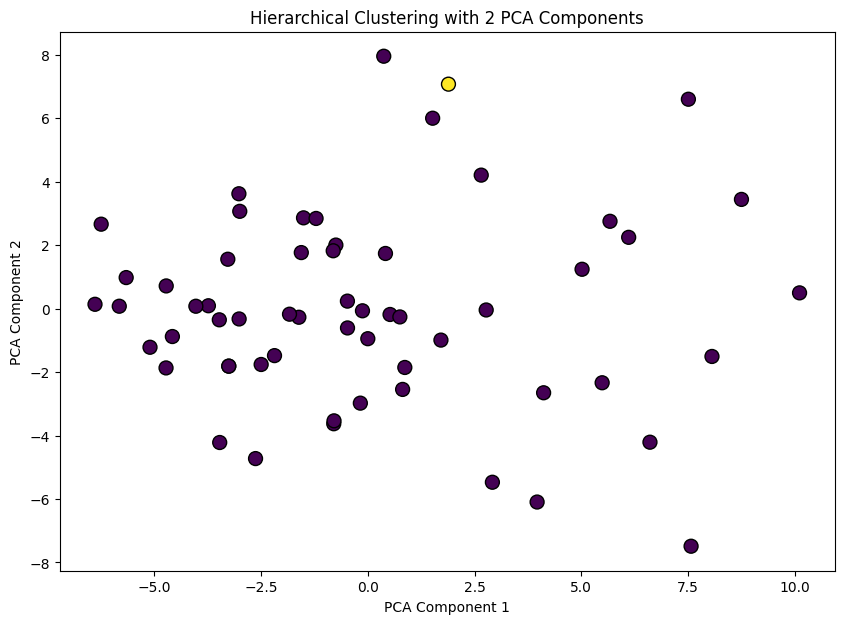

In [116]:
# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Perform Hierarchical Clustering with AgglomerativeClustering
hierarchical_clustering = AgglomerativeClustering(n_clusters=2, linkage='average')

labels_hc = hierarchical_clustering.fit_predict(scaled_data)

# Add the cluster labels to the original dataframe
#df2['Cluster_HC'] = labels_hc

# Apply PCA to reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)


# Calculate the Silhouette Score for hierarchical clustering
silhouette_avg_hc = silhouette_score(scaled_data, labels_hc)
print(f'Silhouette Score for Hierarchical Clustering: {silhouette_avg_hc}')

# Create a scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=labels_hc, cmap='viridis', marker='o', edgecolor='k', s=100)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Hierarchical Clustering with 2 PCA Components')
plt.show()




hm.. not very useful

#Modeling

In [117]:
combined_df

,feature,correlation_coeff,logistic_coeff,RandomForest_Importance,score
0,pitch_mean,0.315082,0.273306,0.254316,0.280901
1,pitch_range,0.211141,0.262516,0.068294,0.180650
2,pitch_variance,0.581869,0.188542,0.313036,0.361149
3,spectral_centroid_mean,0.316632,0.047817,0.154092,0.172847
4,spectral_centroid_range,0.845982,0.172192,0.288662,0.435612
...,...,...,...,...,...
85,chroma11_range,0.187545,0.338418,0.198294,0.241419
86,chroma11_variance,0.038797,0.649169,0.137851,0.275272
87,chroma12_mean,0.593714,0.740879,0.450551,0.595048
88,chroma12_range,0.214238,0.316311,0.274040,0.268196


Data Preparation


In [118]:
# Sort the DataFrame by the 'score' column in descending order
combined_df_sorted = combined_df.sort_values(by='score', ascending=False)

# Extract the top 20 'feature' names
top_20_features = combined_df_sorted.head(20)['feature'].tolist()

top_20_features_with_cluster = top_20_features + ['Cluster_2']

print(top_20_features_with_cluster)


['mfcc5_variance', 'mfcc6_mean', 'mfcc7_variance', 'mfcc9_mean', 'mfcc8_variance', 'chroma12_mean', 'chroma5_mean', 'mfcc7_mean', 'chroma7_variance', 'zcr_range', 'chroma10_variance', 'mfcc9_range', 'chroma4_variance', 'zcr_variance', 'mfcc10_mean', 'spectral_centroid_range', 'mfcc6_range', 'mfcc2_mean', 'chroma5_range', 'mfcc3_mean', 'Cluster_2']


In [119]:
X_data_for_modeling = df59[top_20_features_with_cluster]
y_data_for_modeling = df59['label_numeric']

In [120]:
# Define X and y for modeling
X = X_data_for_modeling
y = y_data_for_modeling

# Print the shapes of X and y to verify
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

X shape: (59, 21)
y shape: (59,)


In [121]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Define and Train MLP Model


In [122]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define the MLP model
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, alpha=0.01, random_state=0)

# Train the MLP model
mlp.fit(X_train, y_train)

# Predict and evaluate
y_pred = mlp.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))


Accuracy: 0.8333333333333334
              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.67      0.67      0.67         3

    accuracy                           0.83        12
   macro avg       0.78      0.78      0.78        12
weighted avg       0.83      0.83      0.83        12



Cross-Validation
Perform cross-validation to ensure the model's performance is consistent across different subsets of the data.

In [123]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(mlp, X, y, cv=5)
print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean()}')


Cross-Validation Accuracy Scores: [0.66666667 0.66666667 0.75       0.66666667 0.27272727]
Mean Cross-Validation Accuracy: 0.6045454545454545


###Save the model1 - with cluster

In [124]:
import joblib

# Save the trained model to a file
model_filename = 'mlp_model1.pkl'
joblib.dump(mlp, model_filename)
print(f"Model saved to {model_filename}")


Model saved to mlp_model1.pkl


###Create another model - without clustering

In [125]:
# Drop the column 'Cluster_2' from X
X = X_data_for_modeling.drop(columns=['Cluster_2'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the MLP model
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, alpha=0.01, random_state=0)

# Train the MLP model
mlp.fit(X_train, y_train)

# Predict and evaluate
y_pred = mlp.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

# Save the trained model to a file
model_filename = 'mlp_model2_without_cluster_2.pkl'
joblib.dump(mlp, model_filename)
print(f"Model saved to {model_filename}")

Accuracy: 0.8333333333333334
              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.67      0.67      0.67         3

    accuracy                           0.83        12
   macro avg       0.78      0.78      0.78        12
weighted avg       0.83      0.83      0.83        12

Model saved to mlp_model2_without_cluster_2.pkl


###Cross validation for model2

In [126]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(mlp, X, y, cv=5)
print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean()}')


Cross-Validation Accuracy Scores: [0.75       0.75       0.83333333 0.66666667 0.72727273]
Mean Cross-Validation Accuracy: 0.7454545454545455


###Test the model

In [127]:
import os
import librosa
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import joblib

# Directory with the new 33 audio files
directory_33 = 'content/audio-shorts/Aibolit_33_parts/'

# Assuming extract_featuresAAA is defined similarly to extract_features
# and returns features_matrix, features_matrix_rows_names, features_matrix_column_names

# Initialize lists to store features, filenames, and labels
features_33 = []
labels_33 = []
features_matrix_33 = []
features_matrix_rows_names_33 = []
features_matrix_column_names_33 = None

# Extract features for all files in the directory
for filename in os.listdir(directory_33):
    if filename.endswith('.wav'):
        file_path = os.path.join(directory_33, filename)
        features_matrix, features_matrix_rows_names, features_matrix_column_names = extract_featuresAAA(file_path)

        # Extract label from the filename
        if 'A' in filename:
            label = 'A'
        elif 'B' in filename:
            label = 'B'
        else:
            label = 'Unknown'  # Handle unexpected cases

        # Append features and label separately
        features_33.append(features_matrix)
        labels_33.append(label)

        # Store column names (assuming they are consistent)
        if features_matrix_column_names_33 is None:
            features_matrix_column_names_33 = features_matrix_column_names

# Convert features and labels to numpy arrays
features_33 = np.array(features_33)
labels_33 = np.array(labels_33)

# Example to print the features and labels
#print('Features (33 files): ', features_33)
#print('Features shape (33 files): ', features_33.shape)
#print('Labels (33 files): ', labels_33)

# Flatten the features and feature names
flattened_features_33 = features_33.reshape(features_33.shape[0], -1)

# Convert to DataFrame
df33 = pd.DataFrame(flattened_features_33, columns=flattened_feature_names)
df33['Label'] = labels_33

# Encode labels as numerical values
df33['label_numeric'] = df33['Label'].map({'A': 1, 'B': 0})

# Display the new DataFrame
#print('Features (33 files): ', df33)
#print('Features shape (33 files): ', df33.shape)


In [128]:
df33.shape

(33, 92)

In [129]:
# Extract the first 90 columns
data33 = df33.iloc[:, :90].values

In [130]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

#assuming data

# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data33)

# Perform K-means clustering with k=2
kmeans_2 = KMeans(n_clusters=2, random_state=0)
labels_2 = kmeans_2.fit_predict(scaled_data)

# Calculate the Silhouette Score for k=2
silhouette_avg_2 = silhouette_score(scaled_data, labels_2)
print(f'Silhouette Score for k=2: {silhouette_avg_2}')

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
pca_components_2 = pca.fit_transform(scaled_data)

# Create a scatter plot
#plt.figure(figsize=(10, 7))
#plt.scatter(pca_components_2[:, 0], pca_components_2[:, 1], c=labels_2, cmap='viridis', marker='o', edgecolor='k', s=100)

# Label the axes
#plt.xlabel('PCA Component 1')
#plt.ylabel('PCA Component 2')

# Title and show plot
#plt.title('K-Means Clustering with 2 PCA Components (k=2)')
#plt.show()


Silhouette Score for k=2: 0.07191849508735941


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [131]:
labels_2

array([1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0], dtype=int32)

In [132]:
# Assign cluster labels to the data
df33['Cluster_2'] = labels_2

In [133]:
df33.head()

,pitch_mean,pitch_range,pitch_variance,spectral_centroid_mean,spectral_centroid_range,spectral_centroid_variance,zcr_mean,zcr_range,zcr_variance,mfcc1_mean,...,chroma10_variance,chroma11_mean,chroma11_range,chroma11_variance,chroma12_mean,chroma12_range,chroma12_variance,Label,label_numeric,Cluster_2
0,1420.778809,3840.465088,1146008.875,1459.042599,3639.702072,325454.902673,0.104148,0.494629,0.004405,-201.327255,...,0.071565,0.091496,0.099080,0.108873,0.118308,0.106637,0.114308,B,0,1
1,1339.924561,3836.365479,1163443.750,1439.070466,3012.454481,313240.570271,0.100804,0.312012,0.003331,-248.773270,...,0.100212,0.110185,0.067925,0.059484,0.114688,0.106567,0.089355,A,1,1
2,1745.033325,3842.015625,1474016.375,2001.749578,4571.077849,862929.523661,0.167771,0.652832,0.016258,-246.547363,...,0.090641,0.115506,0.102843,0.106880,0.104267,0.087800,0.103568,B,0,0
3,1629.047974,3842.321533,1251367.625,1812.024167,4433.170505,691322.933757,0.146385,0.624023,0.013094,-226.455154,...,0.089617,0.099132,0.110125,0.097688,0.103992,0.103023,0.119380,B,0,0
4,1497.513306,3843.384521,1236642.375,1679.703861,4398.491623,652563.152497,0.133244,0.686523,0.013390,-249.405045,...,0.079226,0.089346,0.079722,0.094652,0.115618,0.086978,0.081111,B,0,1


In [134]:
X_33_data_for_modeling = df33[top_20_features_with_cluster]
y_33_data_for_modeling = df33['label_numeric']

###Test model 1 on the new data

In [135]:
import joblib
from sklearn.preprocessing import StandardScaler

# Load the trained model from the file
model_filename = 'mlp_model1.pkl'
mlp_model1 = joblib.load(model_filename)

# Ensure X_33_data_for_modeling is available
# Assuming X_33_data_for_modeling and y_33_data_for_modeling are already defined

# Scale the data using the same scaler
scaler = StandardScaler()
X_33_data_for_modeling_scaled = scaler.fit_transform(X_33_data_for_modeling)

# Make predictions using the loaded model
y_pred_33 = mlp_model1.predict(X_33_data_for_modeling_scaled)

# Print the predictions
print(f'Predictions for _33 data: {y_pred_33}')

# Evaluate the model on _33 data if true labels are available
if 'y_33_data_for_modeling' in locals():
    from sklearn.metrics import accuracy_score, classification_report
    print(f'Accuracy on _33 data: {accuracy_score(y_33_data_for_modeling, y_pred_33)}')
    print(classification_report(y_33_data_for_modeling, y_pred_33))


Predictions for _33 data: [0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0]
Accuracy on _33 data: 0.7272727272727273
              precision    recall  f1-score   support

           0       0.84      0.81      0.82        26
           1       0.38      0.43      0.40         7

    accuracy                           0.73        33
   macro avg       0.61      0.62      0.61        33
weighted avg       0.74      0.73      0.73        33



In [136]:
import pandas as pd

# Create a DataFrame to display the true labels and their corresponding predictions
classification_results = pd.DataFrame({
    'True Label': y_33_data_for_modeling,
    'Predicted Label': y_pred_33
})

# Sort the classification results by the true label
classification_results_sorted = classification_results.sort_values(by='True Label')

# Function to print the results with mistakes in red
def print_classification_results(df):
    for index, row in df.iterrows():
        true_label = row['True Label']
        predicted_label = row['Predicted Label']
        if true_label != predicted_label:
            print(f"\033[91mTrue Label: {true_label}, Predicted Label: {predicted_label}\033[0m")
        else:
            print(f"True Label: {true_label}, Predicted Label: {predicted_label}")

# Print the sorted classification results with mistakes highlighted in red
print_classification_results(classification_results_sorted)


True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 1
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 1
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 1
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 1
True Label: 0, Predicted Label: 1
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0
True Label: 1, Predicted Label: 0
True Label: 1, Predicted Label: 1
True Label: 1, Predicted Label: 0
True Label: 1,

###Test model 2 on the new data

In [137]:
# Drop the column 'Cluster_2' from X
X = X_33_data_for_modeling.drop(columns=['Cluster_2'])


In [138]:
import joblib
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Drop the column 'Cluster_2' from X_33_data_for_modeling
X_33_data_for_modeling_no_cluster = X_33_data_for_modeling.drop(columns=['Cluster_2'])

# Load the trained model from the file
model_filename = 'mlp_model2_without_cluster_2.pkl'
mlp_model2 = joblib.load(model_filename)

# Scale the data using the same scaler
scaler = StandardScaler()
X_33_data_for_modeling_scaled = scaler.fit_transform(X_33_data_for_modeling_no_cluster)

# Make predictions using the loaded model
y_pred_33_no_cluster = mlp_model2.predict(X_33_data_for_modeling_scaled)

# Create a DataFrame to display the true labels and their corresponding predictions
classification_results_no_cluster = pd.DataFrame({
    'True Label': y_33_data_for_modeling,
    'Predicted Label': y_pred_33_no_cluster
})

# Sort the classification results by the true label
classification_results_sorted_no_cluster = classification_results_no_cluster.sort_values(by='True Label')

# Function to print the results with mistakes in red
def print_classification_results(df):
    for index, row in df.iterrows():
        true_label = row['True Label']
        predicted_label = row['Predicted Label']
        if true_label != predicted_label:
            print(f"\033[91mTrue Label: {true_label}, Predicted Label: {predicted_label}\033[0m")
        else:
            print(f"True Label: {true_label}, Predicted Label: {predicted_label}")

# Print the sorted classification results with mistakes highlighted in red
print_classification_results(classification_results_sorted_no_cluster)

# Evaluate the model on _33 data
print(f'Accuracy on _33 data without Cluster_2: {accuracy_score(y_33_data_for_modeling, y_pred_33_no_cluster)}')
print(classification_report(y_33_data_for_modeling, y_pred_33_no_cluster))


True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 1
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 1
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 1
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 1
True Label: 0, Predicted Label: 1
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0
True Label: 1, Predicted Label: 0
True Label: 1, Predicted Label: 1
True Label: 1, Predicted Label: 0
True Label: 1,

Seems both models provided lausy results.


Why? What is wrong?

..oh many things might go wrong

First: a small sample (How many data points should I have to model ..)
Second: wrong choice of audio footage.

Else:
- mistakes
- bad clustering
- bad modeling
- you choose

Failure is important to count in.
*